### Project Description

#### Business Objective
This machine learning project focuses on predicting house prices for 200 apartments in Pune city. By leveraging various regression models and multi-layer perceptron (MLP) models, the project aims to provide valuable insights into the real estate market, helping businesses make informed decisions on property investments and pricing strategies.

#### Key Business Advantages:
Enhanced decision-making: Accurate house price predictions enable businesses to make well-informed decisions on investments, pricing, and marketing strategies.
Competitive advantage: A comprehensive understanding of factors influencing house prices will give businesses a competitive edge in the real estate market.
Improved customer satisfaction: By offering accurately priced properties, businesses can ensure customer satisfaction and long-term client relationships.
Risk reduction: Accurate price predictions help minimize risks associated with property investments, leading to more stable financial outcomes.

#### Data Description
The project utilizes a real estate dataset with 200 rows and 17 variables, influencing the target variable: price.

#### Goal
The primary goal is to predict sale prices for homes in Pune city, enhancing businesses' understanding of the real estate market.

#### Tech Stack
Language: Python
Libraries: sklearn, pandas, NumPy, matplotlib, seaborn, xgboost

#### Approach
The project involves data cleaning, pre-processing, feature engineering, model building, validation, and comparisons, ensuring accurate predictions.

Data Cleaning: Import required libraries, read the dataset, handle missing values, remove outliers, and save the cleaned data.
Data Pre-processing: Convert binary columns to dummy variables, check correlations, and perform feature selection and scaling.
Model Building: Implement various regression models such as Linear, Ridge, Lasso, Elastic Net, Random Forest, XGBoost, K-Nearest Neighbours, and Support Vector Regressor.
Model Validation: Evaluate models using Mean Squared Error, R2 score, and residual plots.
Model Comparisons: Assess model performance and choose the best model for prediction.
MLP Models: Implement MLP Regression with scikit-learn and TensorFlow.
By focusing on the business advantages, this machine learning project aims to help businesses navigate the real estate market more effectively and make data-driven decisions to improve profitability and customer satisfaction.

### Understanding the data set
To make better business decisions, it's crucial to understand the data structure and the variables that impact property prices. In this project, we have a dataset containing 200 apartments in different areas of Pune, with 17 variables to predict the price for similar apartments not included in the dataset. The prediction depends on both the apartment's qualities and its location, which helps real estate agents and apps price properties more reasonably.

#### Data Structure:
Total Township Area in Acres: The total area of the township or society plays a vital role in property prices, as larger townships often offer more amenities and open spaces.

ClubHouse: Presence of a clubhouse or multipurpose hall can positively influence property prices, as it adds recreational and social value to the society.

School / University in Township: Access to educational institutions in or near the township or society can significantly impact property prices, as families prioritize proximity to good schools and universities.
Hospital in 

TownShip: Having a hospital in or near the township or society ensures easy access to medical facilities, making it an essential factor in property pricing.

Mall in TownShip: The presence of a mall or retail store in or near the township or society adds convenience and can boost property prices due to increased demand for nearby shopping facilities.

Park / Jogging track: Having a park or jogging track in the society or township adds to the health and well-being of the residents, making it an attractive feature that can influence property prices.

Swimming Pool: A swimming pool in the society or township offers recreational and fitness opportunities, potentially increasing the demand for properties and positively impacting their prices.

Gym: A gym within the society or township adds value to the property by providing fitness facilities, contributing to the overall appeal and demand for such properties.

By analyzing these variables, businesses can better understand the factors affecting property prices and make informed decisions on property investments, pricing strategies, and marketing campaigns. Moreover, this understanding can help real estate agents and apps offer properties at reasonable prices, ensuring customer satisfaction and fostering long-term relationships with clients.

In [1]:
#import the required libraries
#re: provides regular expression matching operations for data cleaning and preprocessing.
#numpy: provides efficient numerical operations and data structures for working with large datasets.
#pandas: provides data structures and tools for efficient data manipulation, processing, and analysis.
#seaborn: provides high-level visualization functions for statistical graphics and exploratory data analysis.
#matplotlib.pyplot: provides low-level visualization functions for creating high-quality graphics.
#sklearn.impute.KNNImputer: provides a machine learning algorithm to impute missing values in a dataset using k-Nearest Neighbors approach.
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer


In [2]:
#adjusts the font size and the maximum number of columns and rows that can be displayed at once. 
sns.set(font_scale=1.5)

pd.options.display.max_columns=200
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

In [3]:
# import and read the dataset
dfr = pd.read_csv("Real_Estate_Data.csv")

In [4]:
#verify that data set has loaded
dfr.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Unnamed: 17,Unnamed: 18
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN


#### Preliminary exploration
Preliminary exploration of data is critical in developing a regression model as it allows us to identify and understand the relationships and patterns within their data, which enables them to make informed decisions based on reliable insights. Without this preliminary exploration, the resulting regression model may be inaccurate and unreliable, leading to poor decision making and potentially negative business outcomes.

In [5]:
# check the shape
dfr.shape

(200, 19)

In [6]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 200 non-null    object 
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [7]:
# Notice that a column name Propert looks to be miss spelled
# rename Propert column
dfr.rename(columns={"Propert Type":"Property Type"}, inplace=True)

In [8]:
#confirm that the columns have been renamed
print(dfr.columns)

Index(['Sr. No.', 'Location', 'Sub-Area', 'Property Type',
       'Property Area in Sq. Ft.', 'Price in lakhs', 'Price in Millions',
       'Company Name', 'TownShip Name/ Society Name',
       'Total TownShip Area in Acres', 'ClubHouse',
       'School / University in Township ', 'Hospital in TownShip',
       'Mall in TownShip', 'Park / Jogging track', 'Swimming Pool', 'Gym',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')


#### Cleaning the data's characteristics 

In [9]:
# Propert Type column needs cleaning
dfr["Property Type"].unique() 

array(['1 BHK', '2 BHK', '3 BHK', '3 BHK Grand', '2BHK', '3BHK', '4BHK',
       '5BHK', '6BHK', '1BHK', 'shop', '2 bhk', '2bhk ', '3  bhk ',
       '3 bhk', '2bhk', '2.5 BHK', '3 BHK ', '4 bhk', '1 bhk', '2.5 bhk',
       '1bhk', '3bhk', '3.5bhk', '3.5 bhk', '3bhk ', '2+2 bhk', '3+2bhk ',
       '2 bhk ', '5 bhk', '1bhk ', '4.5bhk', '4bhk'], dtype=object)

In [10]:
dfr = dfr[ dfr["Property Type"]!="shop" ]
dfr.shape

(199, 19)

In [11]:
# Same for Property Area in Sq. Ft.
dfr["Property Area in Sq. Ft."].unique()

array(['492', '774', '889', '1018', '743', '975', '877 to 912',
       '1077 to 1272', '905', '1125', '1644', '2220', '662 to 845',
       '890 to 1212', '423', '665', '792 to 965', '462', '666', '750',
       '1030', '446', '796', '842', '865', '902', '1154', '872', '934',
       '1088', '1109', '1163', '1419', '1485', '684', '990', '882',
       '1103', '543', '801 to 1125', '1272 to 2138', '320', '473', '581',
       '790', '820', '989', '1003', '1182', '1579', '491', '659', '732',
       '809', '460', '734', '753', '675', '917', '670', '740', '847',
       '936', '1032', '1698', '2267', '725', '731', '744', '923', '930',
       '792', '1180', '860', '988', '1093', '456', '644', '785', '1060',
       '113', '664', '673', '682', '698', '1239', '1315', '1388', '1463',
       '1671', '1687', '575', '751', '761', '871', '1166', '1206', '1272',
       '1279', '646', '717', '436', '637', '642', '655', '668', '810',
       '735', '783', '805', '1074', '1111', '535', '947', '697', '711',
  

Clean and transform property-related data, which can help to improve the accuracy and usefulness of subsequent analyses or models that use this data.

defines two functions, splitSum and normaliseProps, for normalizing and processing data related to property types and areas.

The splitSum function takes in a string e, which represents either the number of bedrooms or the property area. It removes unnecessary characters and words, splits the string into a list of values, and calculates the total sum. If the flag parameter is True, it returns the total number of bedrooms, otherwise, it returns the mean property area.

The normaliseProps function applies the splitSum function to the "Property Type" and "Property Area in Sq. Ft." columns of a Pandas DataFrame, which extracts the number of bedrooms and mean property area, respectively. The resulting DataFrame is then returned.

In [12]:
def splitSum( e, flag=True ) :
    """
    Gives the total number of bedrooms / property area
    params :
        e : string, either the number of rooms or property area
        flag : boolean, True : number of bedrooms, False : property area
    return :
        float, number of bedrooms / Property Area
    """
    try :
        e = str(e).lower()
        e = re.sub(r"[,;@#?!&$+]+\ *", " ", e)
        e = re.sub(r"[a-z]+", " ", e)
        e = re.sub(r"\s\s", "", e)

        s2list = e.strip().split()
        sumList = sum(float(e) for e in s2list)
            
        # Computing the mean value for property area that look like 
        # e.g. '1101 to 1113'
        e_norm = sumList if flag else sumList/len(s2list)
        return e_norm

    except :
        return np.nan

##############################
def normaliseProps( df ) :
    """
    Extracts the number of rooms from 'Property Type' columns and mean values for 
    "Property Area in Sq. Ft."
    Params :
        data : Pandas dataframe, the input data
    Returns :
        Pandas dataframe
    """
    data = df.copy()
    data["Property Type"] = data["Property Type"].apply( splitSum )
    data["Property Area in Sq. Ft."] = \
       data["Property Area in Sq. Ft."]\
            .apply( lambda x : splitSum(x, False) )
    
    return data

In [13]:
# Normalising the Propert Type and Property Area in Sq. Ft.
df_norm = normaliseProps(dfr)

In [14]:
df_norm["Property Type"].unique()

array([1. , 2. , 3. , 4. , 5. , 6. , 2.5, 3.5, 4.5])

In [15]:
df_norm["Property Area in Sq. Ft."].unique()

array([ 492. ,  774. ,  889. , 1018. ,  743. ,  975. ,  894.5, 1174.5,
        905. , 1125. , 1644. , 2220. ,  753.5, 1051. ,  423. ,  665. ,
        878.5,  462. ,  666. ,  750. , 1030. ,  446. ,  796. ,  842. ,
        865. ,  902. , 1154. ,  872. ,  934. , 1088. , 1109. , 1163. ,
       1419. , 1485. ,  684. ,  990. ,  882. , 1103. ,  543. ,  963. ,
       1705. ,  320. ,  473. ,  581. ,  790. ,  820. ,  989. , 1003. ,
       1182. , 1579. ,  491. ,  659. ,  732. ,  809. ,  460. ,  734. ,
        753. ,  675. ,  917. ,  670. ,  740. ,  847. ,  936. , 1032. ,
       1698. , 2267. ,  725. ,  731. ,  744. ,  923. ,  930. ,  792. ,
       1180. ,  860. ,  988. , 1093. ,  456. ,  644. ,  785. , 1060. ,
        113. ,  664. ,  673. ,  682. ,  698. , 1239. , 1315. , 1388. ,
       1463. , 1671. , 1687. ,  575. ,  751. ,  761. ,  871. , 1166. ,
       1206. , 1272. , 1279. ,  646. ,  717. ,  436. ,  637. ,  642. ,
        655. ,  668. ,  810. ,  735. ,  783. ,  805. , 1074. , 1111. ,
      

In [16]:
df_norm.dtypes

Sr. No.                               int64
Location                             object
Sub-Area                             object
Property Type                       float64
Property Area in Sq. Ft.            float64
Price in lakhs                       object
Price in Millions                    object
Company Name                         object
TownShip Name/ Society Name          object
Total TownShip Area in Acres        float64
ClubHouse                            object
School / University in Township      object
Hospital in TownShip                 object
Mall in TownShip                     object
Park / Jogging track                 object
Swimming Pool                        object
Gym                                  object
Unnamed: 17                         float64
Unnamed: 18                         float64
dtype: object

#### Determine and Clean Outliers

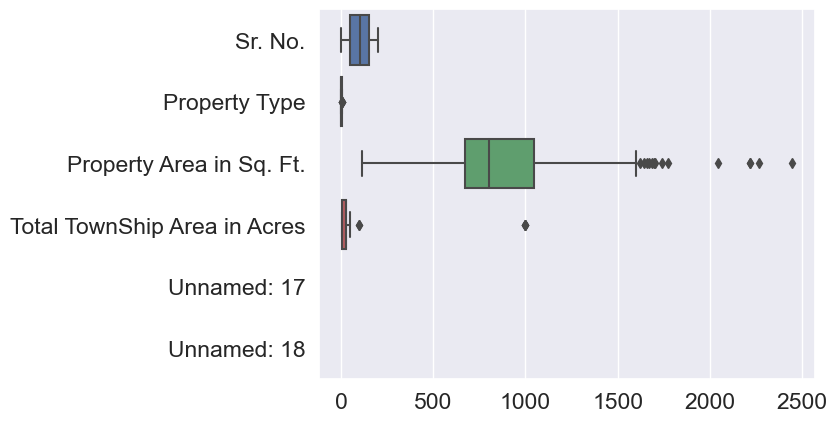

In [17]:
sns.boxplot( data=df_norm , orient="h")
plt.show()

Provide a function for computing the upper or lower fence for a given column, which can help identify outliers and remove or transform them to improve the quality and accuracy of data analyses or models.

In [18]:
def computeUpperFence( df_col, up=True ):
    """
    Computes the upper/lower fence for a given column.
    Params:
        df_col: Pandas series, dataframe column
        up: boolean, True for upper fence, False for lower fence
    Return:
        upper/lower fence value : float
    """
    iqr = df_col.quantile(.75) - df_col.quantile(.25) # inter quartile range
    if up:
        return df_col.quantile(.75) + iqr*1.5
    return df_col.quantile(.25) - iqr*1.5    

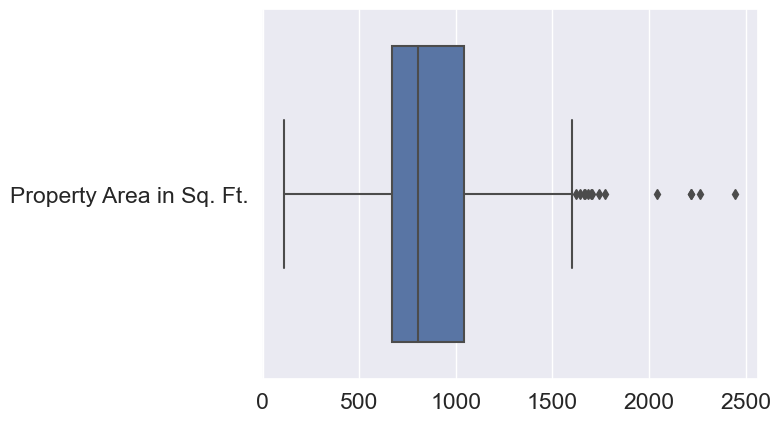

In [19]:
# Looking for outliers
sns.boxplot( data=df_norm[["Property Area in Sq. Ft."]], orient="h" )
plt.show()

In [20]:
# Checking the outliers for Property Area in Sq. Ft.
x_pa = df_norm['Property Area in Sq. Ft.']
pa_up_lim = computeUpperFence(x_pa)
df_norm[ x_pa>pa_up_lim]
# Notice they are atypical not outliers. They have many rooms. 

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Unnamed: 17,Unnamed: 18
10,11,"Pune, Maharashtra, India",Ravet,4.0,1644.0,135,13.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
41,42,"Pune, Maharashtra, India",Keshav Nagar,3.0,1705.0,Null,#VALUE!,Mantra Properties,Mantra Insignia,NaN,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
67,68,"Pune, Maharashtra, India",kayani nagar,3.0,1698.0,249,24.9,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes,NaN,NaN
68,69,"Pune, Maharashtra, India",kayani nagar,4.0,2267.0,460,46,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes,NaN,NaN
96,97,"Pune, Maharashtra, India",NIBM,3.5,1671.0,211,21.1,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes,NaN,NaN
97,98,"Pune, Maharashtra, India",NIBM,3.5,1687.0,213,21.3,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes,NaN,NaN
128,129,"Pune, Maharashtra, India",Hinjewadi,5.0,1772.0,177,17.7,Shapoorji Paloonji,Sensorium,NaN,yes,no,no,no,yes,yes,yes,NaN,NaN
131,132,"Pune, Maharashtra, India",hadapsar,5.0,1662.0,130,13,Wellwisher Apartments,kiarah terrazo,NaN,no,no,no,no,yes,no,no,NaN,NaN


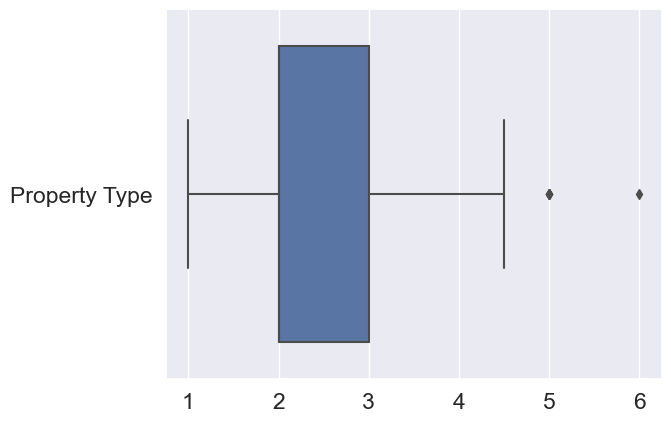

In [21]:
# Looking for outliers
sns.boxplot( data=df_norm[["Property Type"]], orient="h" )
plt.show()

In [22]:
# Checking the outliers for Property type.
x_prt = df_norm['Property Type']
prt_up_lim = computeUpperFence(x_prt)
df_norm[ x_prt>prt_up_lim]
# They are atypical not outliers. They have many rooms. 

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Unnamed: 17,Unnamed: 18
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
50,51,"Pune, Maharashtra, India",Akurdi,5.0,1579.0,163,16.3,Mantra Properties,Mantra Sky Tower,3.5,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
128,129,"Pune, Maharashtra, India",Hinjewadi,5.0,1772.0,177,17.7,Shapoorji Paloonji,Sensorium,NaN,yes,no,no,no,yes,yes,yes,NaN,NaN
131,132,"Pune, Maharashtra, India",hadapsar,5.0,1662.0,130,13,Wellwisher Apartments,kiarah terrazo,NaN,no,no,no,no,yes,no,no,NaN,NaN


Create a scatter plot of normalized property data in order to visually explore the relationship between the number of bedrooms and the property area in square meters.

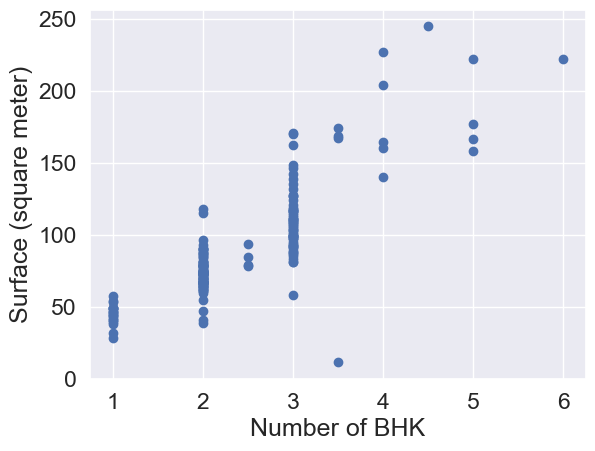

In [23]:
plt.scatter(df_norm["Property Type"], 
            df_norm["Property Area in Sq. Ft."]*.1)
plt.xlabel("Number of BHK")
plt.ylabel("Surface (square meter)")
plt.show()

In [24]:
df_norm.shape

(199, 19)

0
count    198.000000
mean       9.546667
std       10.208554
min        1.319000
25%        5.125000
50%        7.125000
75%        9.971750
max       93.000000
Name: Price in Millions, dtype: float64


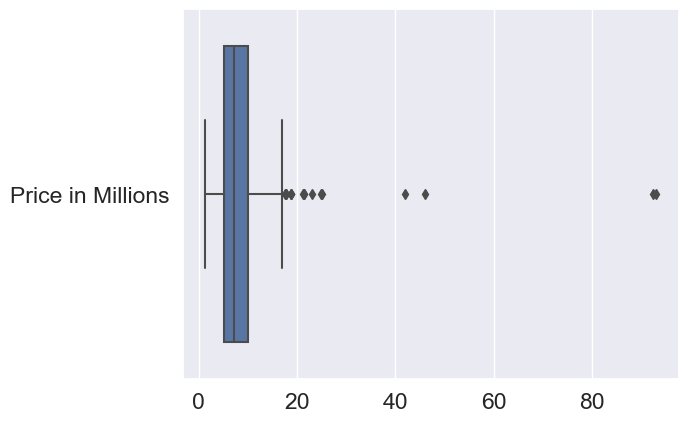

In [25]:
# Convert "Price in Millions" column to numeric type and drop missing values
df_norm["Price in Millions"] = pd.to_numeric(df_norm["Price in Millions"], errors='coerce')
df_norm.dropna(subset=["Price in Millions"], inplace=True)

# Print number of missing values and descriptive statistics of the column
print(df_norm["Price in Millions"].isna().sum())
print(df_norm["Price in Millions"].describe())

# Plot the boxplot
sns.boxplot(data=df_norm[["Price in Millions"]], orient="h")
plt.show()

In [26]:
# Checking the outliers for Price in Millions
x_pim = df_norm['Price in Millions']
pim_up_lim = computeUpperFence(x_pim)
df_norm[ x_pim>pim_up_lim]
# They are essentially large apartments except 2.

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Unnamed: 17,Unnamed: 18
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
67,68,"Pune, Maharashtra, India",kayani nagar,3.0,1698.0,249,24.9,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes,NaN,NaN
68,69,"Pune, Maharashtra, India",kayani nagar,4.0,2267.0,460,46.0,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes,NaN,NaN
73,74,"Pune, Maharashtra, India",pisoli,3.0,923.0,923,92.3,nirman developers,brookefield willows,NaN,yes,no,no,no,yes,yes,yes,NaN,NaN
74,75,"Pune, Maharashtra, India",pisoli,3.0,930.0,930,93.0,nirman developers,brookefield willows,NaN,yes,no,no,no,yes,yes,yes,NaN,NaN
94,95,"Pune, Maharashtra, India",NIBM,3.0,1388.0,178,17.8,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes,NaN,NaN
95,96,"Pune, Maharashtra, India",NIBM,3.0,1463.0,187,18.7,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes,NaN,NaN
96,97,"Pune, Maharashtra, India",NIBM,3.5,1671.0,211,21.1,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes,NaN,NaN
97,98,"Pune, Maharashtra, India",NIBM,3.5,1687.0,213,21.3,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes,NaN,NaN


For business decision making it is important to visualize the distribution of extreme prices, i.e., the prices that exceed the upper limit of the price range considered normal for the business context. This can help business leaders identify potential outliers and anomalies in their pricing data and make informed decisions regarding pricing strategies, product offerings, and market positioning.

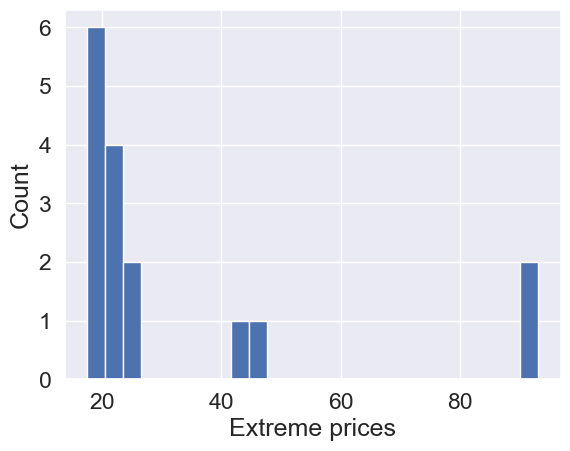

In [27]:
df_norm[ x_pim>pim_up_lim]["Price in Millions"].hist(bins=25)
plt.xlabel("Extreme prices")
plt.ylabel("Count")
plt.show()

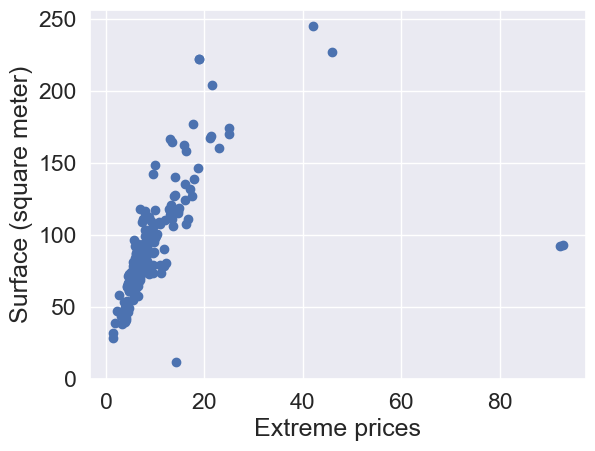

In [28]:
# create a scatter plot that shows the relationship between the price of properties (in millions) and their surface area (in square feet). 
plt.scatter(df_norm["Price in Millions"], 
            df_norm["Property Area in Sq. Ft."]*.1)
plt.xlabel("Extreme prices")
plt.ylabel("Surface (square meter)")
plt.show()

In [29]:
df_norm = df_norm[df_norm["Price in Millions"]<80]

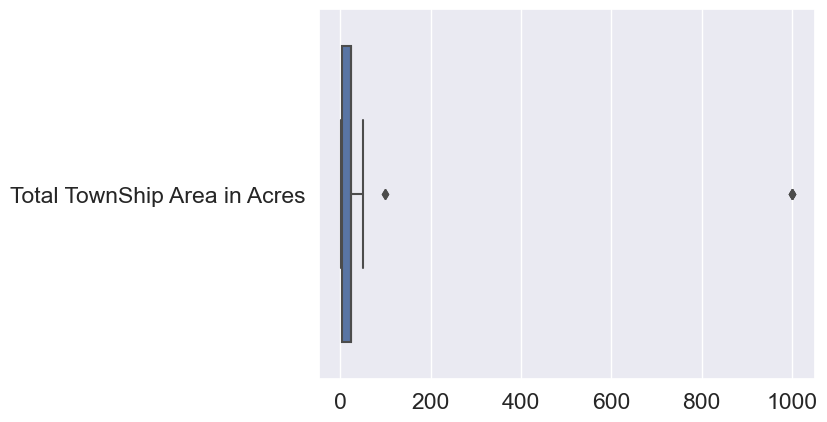

In [30]:
sns.boxplot( data=df_norm[["Total TownShip Area in Acres"]], orient="h" )
plt.show()

In [31]:
# Checking the outliers for Total TownShip Area in Acres
x_tta = df_norm['Total TownShip Area in Acres']
tta_up_lim = computeUpperFence(x_tta)
df_norm[ x_tta>tta_up_lim]
# Large cities are not outliers.

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Unnamed: 17,Unnamed: 18
0,1,"Pune, Maharashtra, India",Bavdhan,1.0,492.0,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
1,2,"Pune, Maharashtra, India",Bavdhan,2.0,774.0,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
2,3,"Pune, Maharashtra, India",Bavdhan,3.0,889.0,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
3,4,"Pune, Maharashtra, India",Bavdhan,3.0,1018.0,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
4,5,"Pune, Maharashtra, India",Mahalunge,2.0,743.0,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN
5,6,"Pune, Maharashtra, India",Mahalunge,3.0,975.0,95,9.5,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN


In [32]:
tta_low_lim = computeUpperFence(x_tta)
df_norm[ x_tta<tta_low_lim]
# These are small sub-areas

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Unnamed: 17,Unnamed: 18
6,7,"Pune, Maharashtra, India",Balewadi,2.0,894.5,75,7.5,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
7,8,"Pune, Maharashtra, India",Balewadi,3.0,1174.5,100,10.0,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
8,9,"Pune, Maharashtra, India",Ravet,2.0,905.0,65,6.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
9,10,"Pune, Maharashtra, India",Ravet,3.0,1125.0,88,8.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
10,11,"Pune, Maharashtra, India",Ravet,4.0,1644.0,135,13.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
13,14,"Pune, Maharashtra, India",Baner,2.0,753.5,58,5.8,VTP Reality,VTP Cierra,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
14,15,"Pune, Maharashtra, India",Baner,3.0,1051.0,95,9.5,VTP Reality,VTP Cierra,10.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN
15,16,"Pune, Maharashtra, India",Mahalunge,1.0,423.0,40,4.0,VTP Reality,VTP Blue Water,50.0,Yes,No,No,No,Yes,Yes,Yes,NaN,NaN


#### Price Selection

In [33]:
#convert the "Price in lakhs" column of a pandas DataFrame to numeric values
# Comparing Price in Millions with Price in lakhs
df_norm["Price in lakhs"] = df_norm["Price in lakhs"]\
                    .apply(lambda x: pd.to_numeric(x, errors='coerce') )

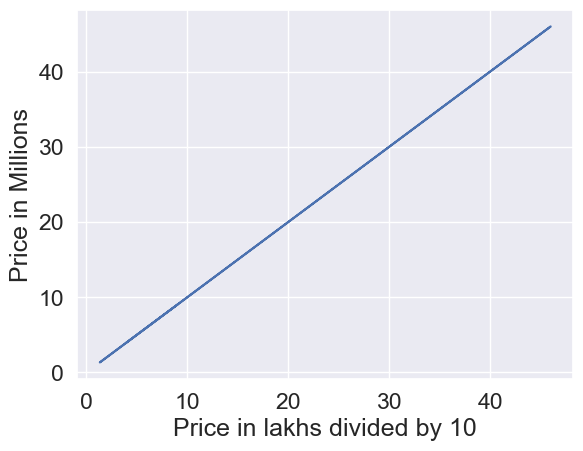

In [34]:
#create a scatter plot comparing the "Price in lakhs" and "Price in Millions" columns in the DataFrame. 
plt.plot( df_norm["Price in lakhs"]/10., df_norm["Price in Millions"] )
plt.xlabel("Price in lakhs divided by 10")
plt.ylabel("Price in Millions")
plt.show()

In [35]:
df_norm = df_norm.drop(columns=["Price in lakhs"])

define the three functions for computing and visualizing the fill rate of a Pandas dataframe, as well as dropping axes that do not meet a specified minimum non-NaN rate.

In [36]:
def compute_fill_rate( df ) :
    """
    Computing the rate of non-NaNs for each column
    Params :
        df : Pandas dataframe, input data
    Return :
        Pandas dataframe
    """
    fr = pd.DataFrame(1-df.isnull().sum().values.reshape(1,-1)/df.shape[0], 
                         columns=df.columns)
    return fr

###########################################
def plot_fill_rate( df ) : 
    """
    Plot the fill rate
    df : Pandas dataframe, input data
    """
    fill_rate = compute_fill_rate( df )
    fig, ax = plt.subplots( figsize=(18,18) )
    sns.barplot(data=fill_rate, orient="h")
    ax.set_title( "Fill rate for columns", fontsize=28 )
    ax.set(xlim=(0, 1.))
    
    
###########################################
def drop_empty_axis( df, minFillRate, axis=1 ) :
    """
    Drops axes that do not meet the minimum non-Nan rate
    Params :
        df : Pandas dataframe
        minFillRate : float, minimum filled fraction [0,1]
        axis : int, 1 for column, 0 for row
    Returns :
        Pandas dataframe 
    """
    i = 0 if axis==1 else 1 
    return df.dropna( axis=axis, thresh=int(df.shape[i]*minFillRate) )

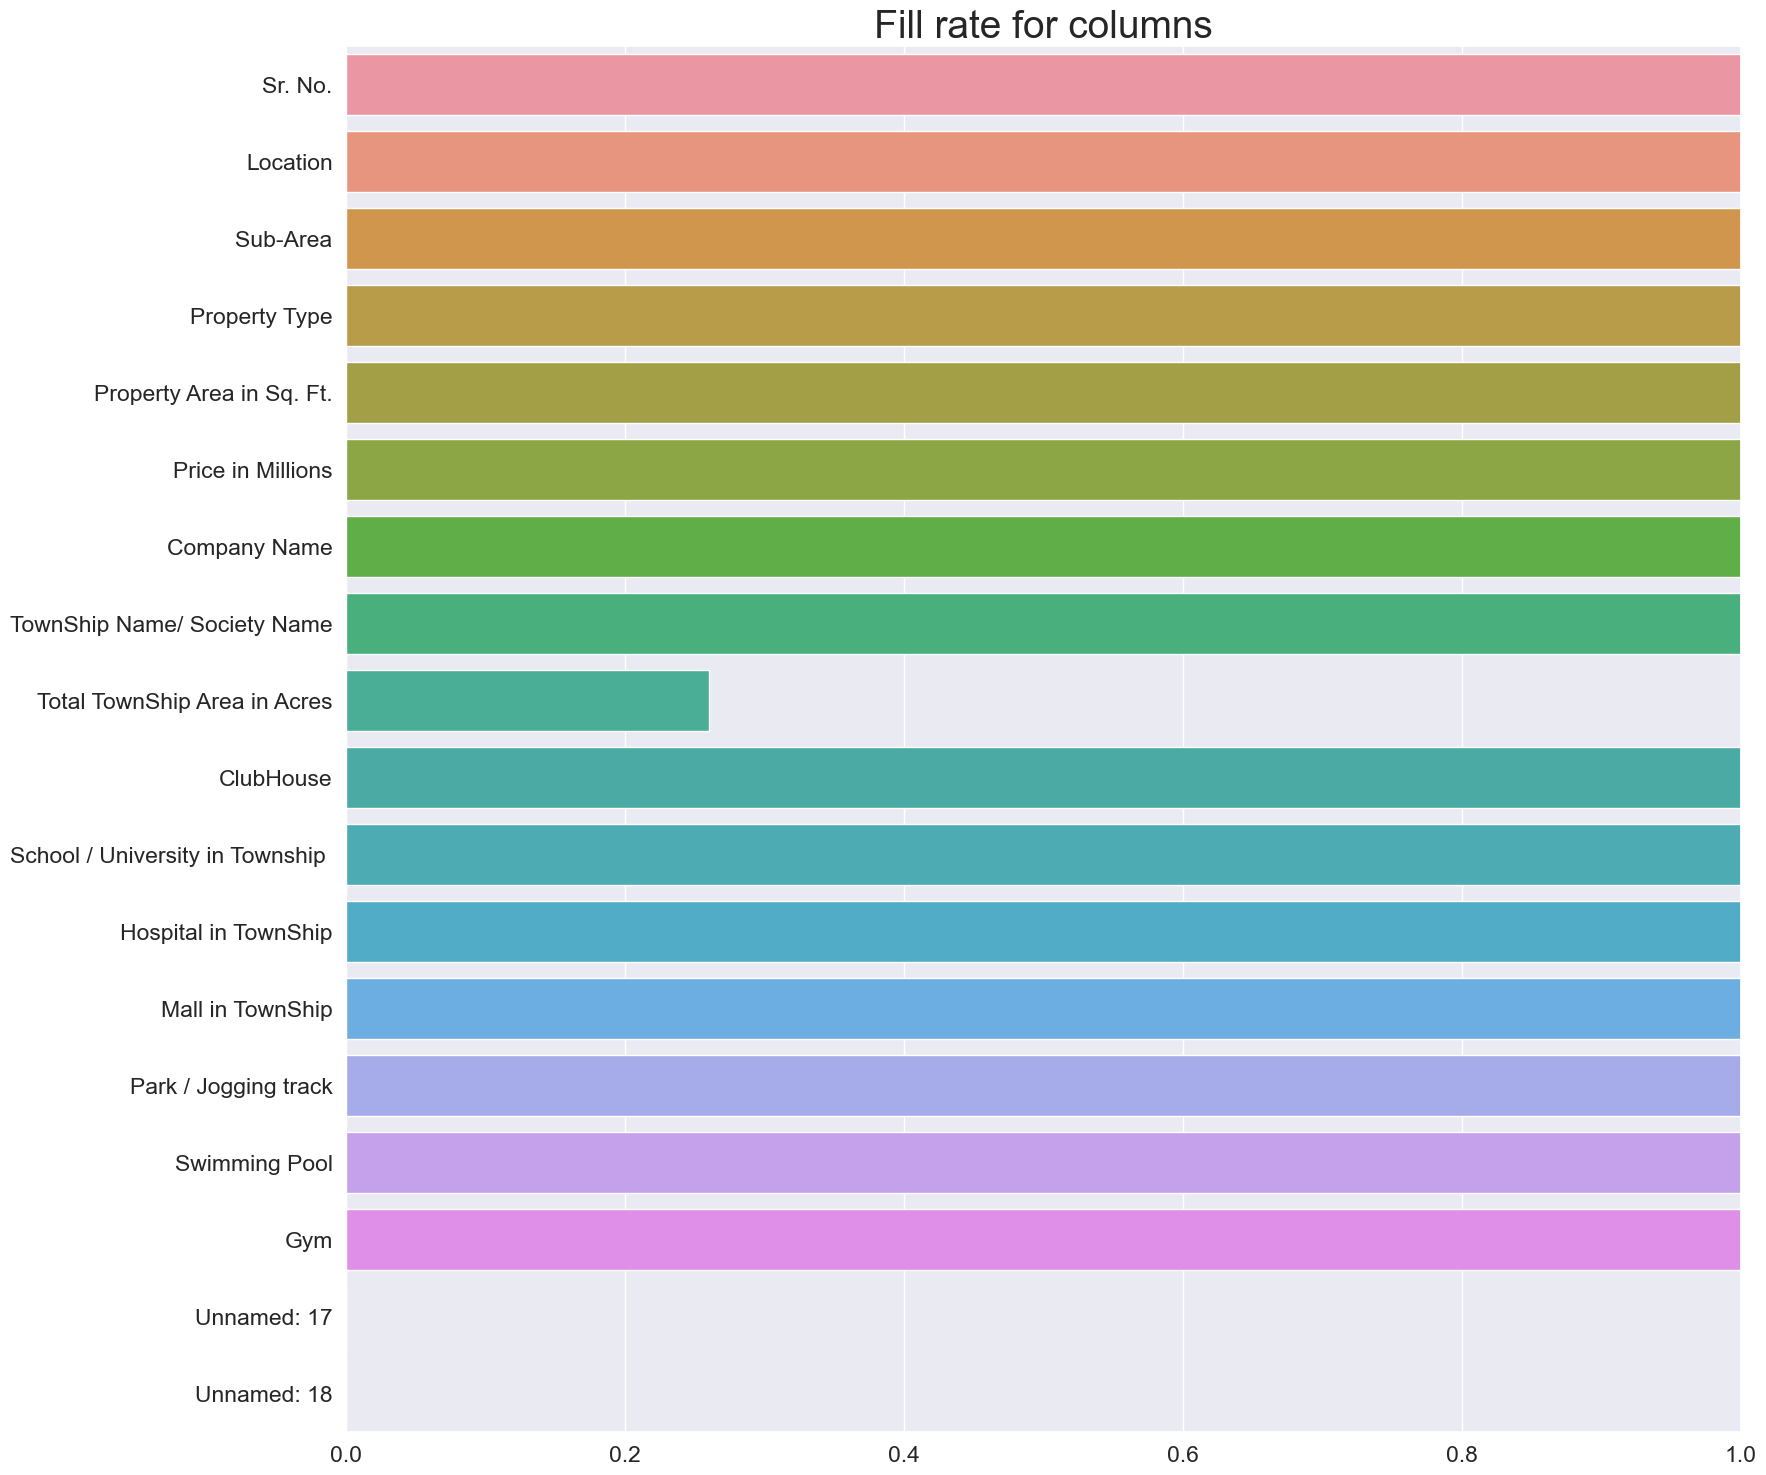

In [37]:
plot_fill_rate( df_norm )

In [38]:
compute_fill_rate( df_norm )

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Unnamed: 17,Unnamed: 18
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.260204,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [39]:
# Total TownShip Area in Acres
df_norm[["Sub-Area", "TownShip Name/ Society Name", "Total TownShip Area in Acres" ]]\
    .sort_values("Sub-Area").reset_index(drop=True)

,Sub-Area,TownShip Name/ Society Name,Total TownShip Area in Acres
0,Akurdi,Mantra Sky Tower,3.5
1,Akurdi,Mantra Sky Tower,3.5
2,Akurdi,Mantra Sky Tower,3.5
3,Akurdi,Mantra Sky Tower,3.5
4,Akurdi,Mantra Sky Tower,3.5
5,Akurdi,Mantra Sky Tower,3.5
6,BANER,TEJ ELEVIA,2.5
7,BANER,vtp solitaire,NaN
8,BANER,SUPREME ESTIA,5.0
9,BANER,SUPREME ESTIA,5.0


In [40]:
# Drop columns filled by less than 50%
df_norm = drop_empty_axis(df_norm, minFillRate=.5)

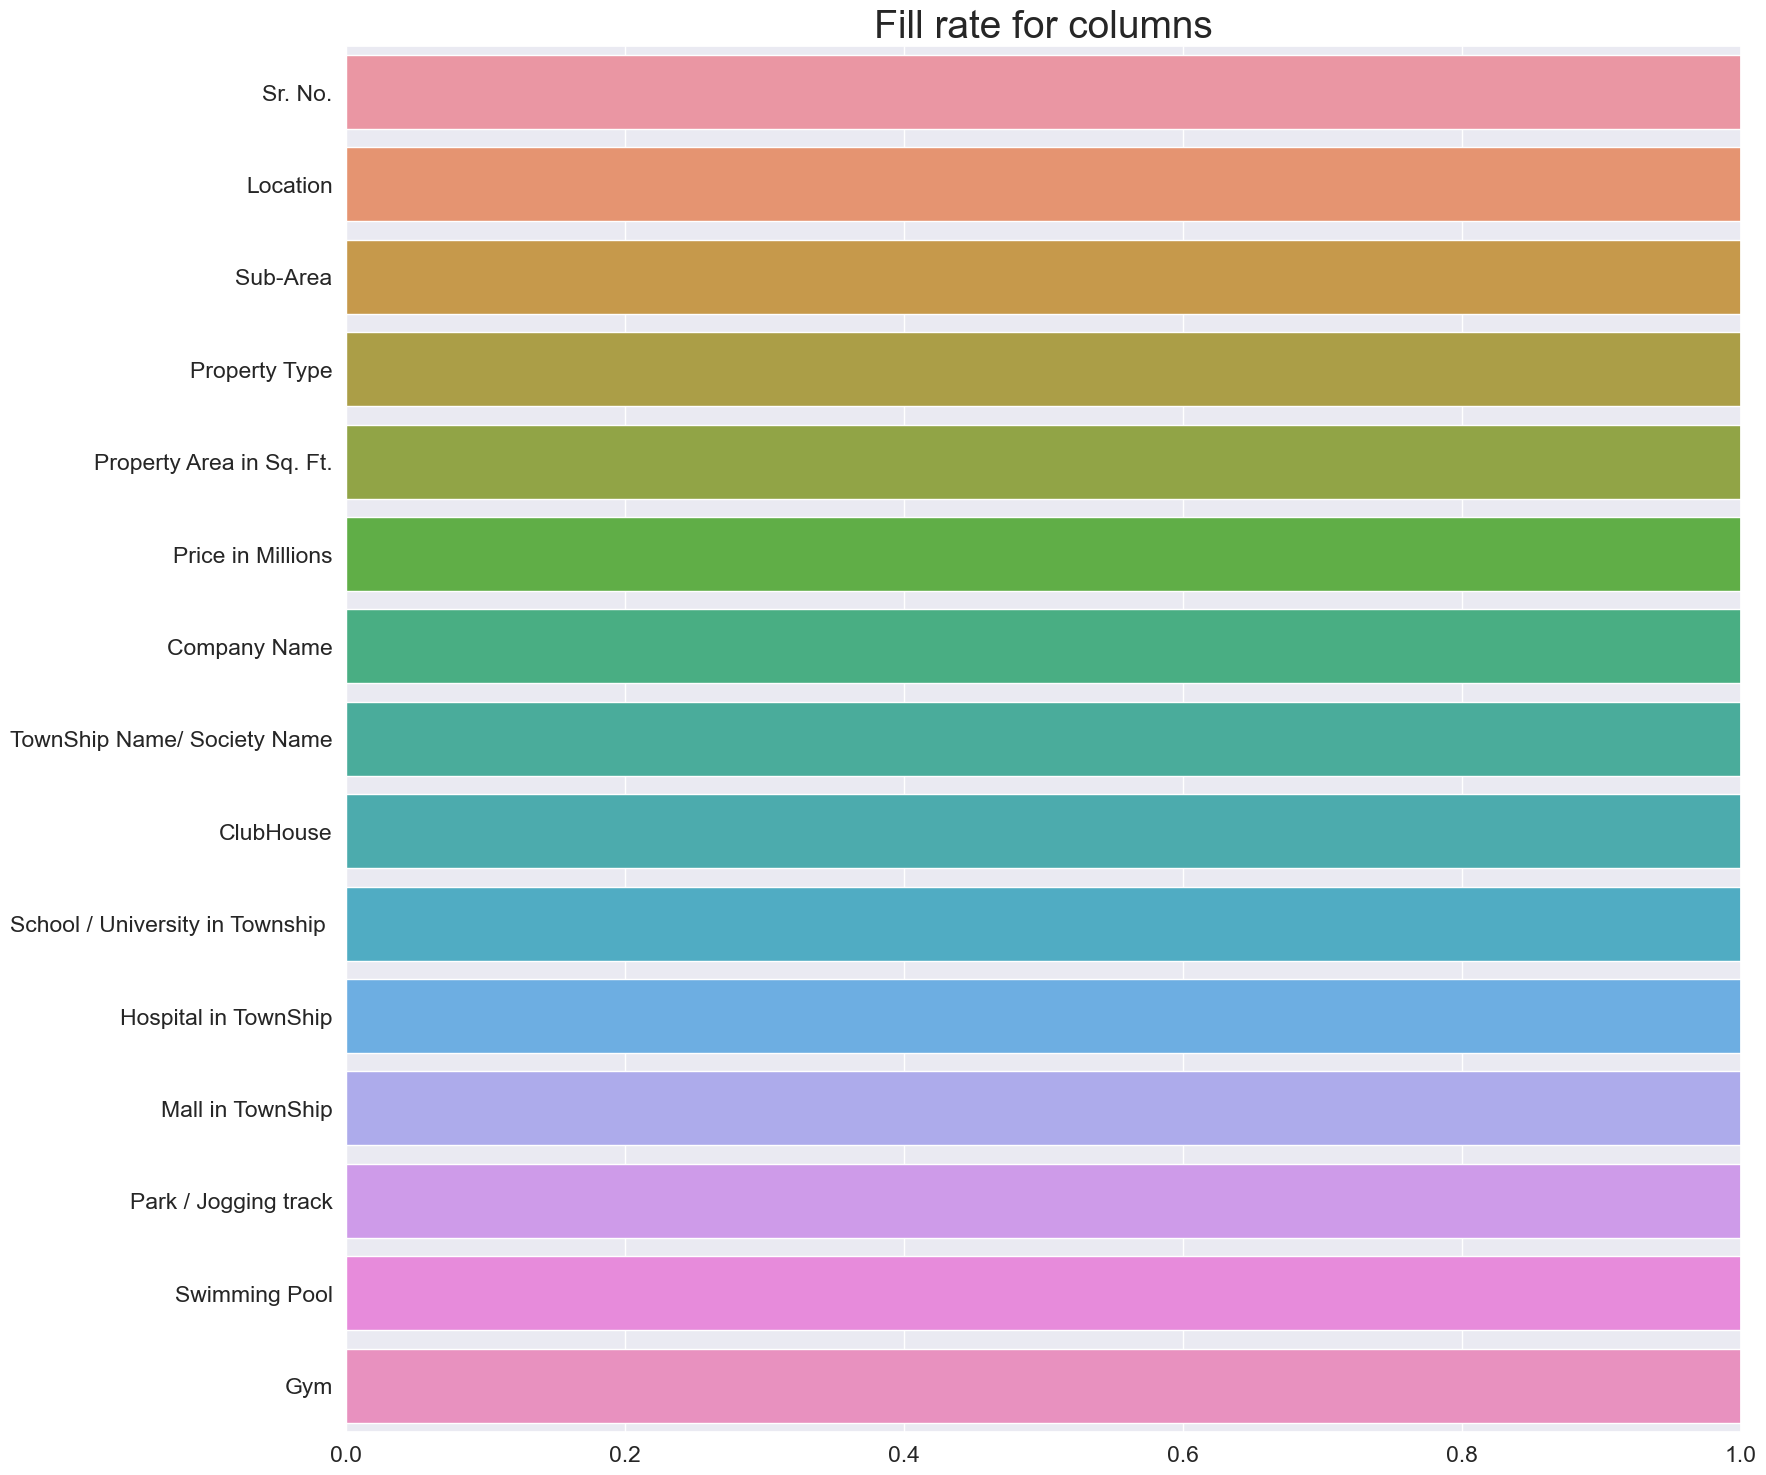

In [41]:
plot_fill_rate( df_norm )

####  Regularizing  the categorical columns

In [42]:
df_norm.select_dtypes(include="object").head(3)

,Location,Sub-Area,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes


#### Binary categorical columns

In [43]:
binary_cols = df_norm.iloc[:,-7:].columns.to_list()
binary_cols

['ClubHouse',
 'School / University in Township ',
 'Hospital in TownShip',
 'Mall in TownShip',
 'Park / Jogging track',
 'Swimming Pool',
 'Gym']

In [44]:
#define a function that prints out the unique values for a list of specified columns in a given dataframe, along with the number of unique categories for each column. 
def print_uniques( cols, df=df_norm ):
    for col in cols:
        list_unique = df[col].unique()
        list_unique.sort()
        print(col, ":\n", list_unique)
        print("Number of unique categories:", len(list_unique))
        print("--------------------")
        

In [45]:
print_uniques(binary_cols)

ClubHouse :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
--------------------
School / University in Township  :
 ['No' 'Yes' 'no']
Number of unique categories: 3
--------------------
Hospital in TownShip :
 ['No' 'Yes' 'no']
Number of unique categories: 3
--------------------
Mall in TownShip :
 ['No' 'Yes' 'no' 'no ']
Number of unique categories: 4
--------------------
Park / Jogging track :
 ['No' 'Yes' 'no' 'yes']
Number of unique categories: 4
--------------------
Swimming Pool :
 ['No' 'Yes' 'no' 'no ' 'yes']
Number of unique categories: 5
--------------------
Gym :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
--------------------


In [46]:
for col in binary_cols:
    df_norm[col] = df_norm[col].apply(lambda x: x.strip().lower())
    
print_uniques(binary_cols)

ClubHouse :
 ['no' 'yes']
Number of unique categories: 2
--------------------
School / University in Township  :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Hospital in TownShip :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Mall in TownShip :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Park / Jogging track :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Swimming Pool :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Gym :
 ['no' 'yes']
Number of unique categories: 2
--------------------


#### Multi-categorical columns

In [47]:
obj_cols = df_norm.select_dtypes(include="object").columns.to_list()
multiCat_cols = list(set(obj_cols)^set(binary_cols))
multiCat_cols

['Location', 'Company Name', 'Sub-Area', 'TownShip Name/ Society Name']

In [48]:
for col in multiCat_cols:
    df_norm[col] = df_norm[col].apply(lambda x: x.strip().lower())

In [49]:
print_uniques(multiCat_cols)

Location :
 ['pune, maharashtra, india']
Number of unique categories: 1
--------------------
Company Name :
 ['ace constructions' 'anp corp' 'bhaktamar realities' 'calyx spaces'
 'dolphin group' 'godrej properties' 'jhala group' 'kalpataru'
 'keystone landmark' 'kohinoor group' 'kundan spaces' 'lush life'
 'maha anand pinnac associates' 'majestique landmarks' 'mantra properties'
 'nirman developers' 'oxy buildcorp' 'porwal  develkoper'
 'porwal & anand develkoper' 'proviso group' 'puraniks' 'ravima ventures'
 'sagitarius ecospaces llp' 'shapoorji paloonji' 'shroff developers'
 'sukwani associates' 'supreme' 'tejraaj group' 'unique properties'
 'urban space creator' 'vasupujya corporation'
 'venkatesh bhoomi construction' 'vijaya laxmi creations'
 'vijaya laxmi infrarealtors' 'vtp reality' 'waghvani constructions'
 'wellwisher apartments']
Number of unique categories: 37
--------------------
Sub-Area :
 ['akurdi' 'balewadi' 'baner' 'bavdhan' 'bavdhan budruk' 'bt kawade rd'
 'dhanori' 'h

In [50]:
df_norm.drop(columns=["Location"], inplace=True)

In [51]:
df_norm.head() 

,Sr. No.,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,bavdhan,1.0,492.0,3.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,2,bavdhan,2.0,774.0,6.5,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,3,bavdhan,3.0,889.0,7.4,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,4,bavdhan,3.0,1018.0,8.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,5,mahalunge,2.0,743.0,7.4,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


In [52]:
df_norm.shape

(196, 14)

#### Saving the cleaned data set

In [53]:
df_norm.columns=[ "index", "sub_area", "n_bhk", "surface", "price", 
                                     "company_name", "township",
                                     "club_house", "school", "hospital", 
                                     "mall", "park", "pool", "gym"]

In [54]:
df_norm.to_csv("Real_clean.csv", index=False)

## Analyzing Data

In [55]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [56]:
sns.set(font_scale=1.5)

In [57]:
df = pd.read_csv( "Real_clean.csv" )

#### Preliminary exploration

In [58]:
# check for the new shape and columns
df.shape, df.columns

((196, 14),
 Index(['index', 'sub_area', 'n_bhk', 'surface', 'price', 'company_name',
        'township', 'club_house', 'school', 'hospital', 'mall', 'park', 'pool',
        'gym'],
       dtype='object'))

In [59]:
# check for the unique values
df["company_name"].unique(), df["township"].unique()

(array(['shapoorji paloonji', 'godrej properties', 'anp corp',
        'urban space creator', 'vtp reality', 'waghvani constructions',
        'sukwani associates', 'mantra properties', 'ravima ventures',
        'proviso group', 'unique properties', 'sagitarius ecospaces llp',
        'nirman developers', 'jhala group', 'shroff developers',
        'kundan spaces', 'venkatesh bhoomi construction', 'lush life',
        'maha anand pinnac associates', 'vasupujya corporation',
        'ace constructions', 'wellwisher apartments', 'dolphin group',
        'oxy buildcorp', 'kohinoor group', 'bhaktamar realities',
        'porwal & anand develkoper', 'porwal  develkoper',
        'keystone landmark', 'puraniks', 'majestique landmarks',
        'kalpataru', 'vijaya laxmi creations',
        'vijaya laxmi infrarealtors', 'calyx spaces', 'supreme',
        'tejraaj group'], dtype=object),
 array(['vanaha', 'godrej hills retreat', 'anp universe', 'urban skyline',
        'vtp cierra', 'vtp blue

In [60]:
# drop the columns
df = df.drop(columns=["index", "company_name", "township"]).drop_duplicates()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sub_area    196 non-null    object 
 1   n_bhk       196 non-null    float64
 2   surface     196 non-null    float64
 3   price       196 non-null    float64
 4   club_house  196 non-null    object 
 5   school      196 non-null    object 
 6   hospital    196 non-null    object 
 7   mall        196 non-null    object 
 8   park        196 non-null    object 
 9   pool        196 non-null    object 
 10  gym         196 non-null    object 
dtypes: float64(3), object(8)
memory usage: 18.4+ KB


In [62]:
df.tail(10)

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
186,bavdhan,2.0,665.0,6.499,yes,no,no,no,yes,no,no
187,talegoan,1.0,280.0,1.319,yes,no,no,no,yes,yes,yes
188,talegoan,2.0,385.0,1.729,yes,no,no,no,yes,no,yes
189,baner,2.0,730.0,8.700,yes,no,no,no,yes,yes,yes
190,baner,3.0,1135.0,12.900,yes,no,no,no,yes,yes,yes
191,baner,3.0,1350.0,16.000,yes,no,no,no,yes,yes,yes
192,baner,4.0,1600.0,23.000,yes,no,no,no,yes,yes,yes
193,baner,2.0,789.0,9.500,no,no,no,no,yes,yes,yes
194,baner,3.0,1107.0,13.500,no,no,no,no,yes,yes,yes
195,baner,2.0,776.0,9.068,yes,no,no,no,yes,yes,yes


#### Converting binary columns to dummy variables

In [63]:
# Selecting the binary columns
binary_cols = df.iloc[:, 4:].columns.to_list()
binary_cols

['club_house', 'school', 'hospital', 'mall', 'park', 'pool', 'gym']

In [64]:
# average price for apartments with and without swimming pool
df[["price", "pool"]].groupby("pool")["price"].mean()

pool
no      6.456944
yes    10.000323
Name: price, dtype: float64

In [65]:
# Transforming the yes/no to 1/0
laben = LabelEncoder()
for col in binary_cols:
    df[col] = laben.fit_transform(df[col])
    
df.tail(10)

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
186,bavdhan,2.0,665.0,6.499,1,0,0,0,1,0,0
187,talegoan,1.0,280.0,1.319,1,0,0,0,1,1,1
188,talegoan,2.0,385.0,1.729,1,0,0,0,1,0,1
189,baner,2.0,730.0,8.700,1,0,0,0,1,1,1
190,baner,3.0,1135.0,12.900,1,0,0,0,1,1,1
191,baner,3.0,1350.0,16.000,1,0,0,0,1,1,1
192,baner,4.0,1600.0,23.000,1,0,0,0,1,1,1
193,baner,2.0,789.0,9.500,0,0,0,0,1,1,1
194,baner,3.0,1107.0,13.500,0,0,0,0,1,1,1
195,baner,2.0,776.0,9.068,1,0,0,0,1,1,1


#### Sub areas contribution

In [66]:
#calculate the contribution of different sub-areas on the dataset, specifically with respect to the "price" column.
# Contribution of different sub-areas on the dataset 
df_sa_count = df.groupby("sub_area")["price"].count().reset_index()\
                .rename(columns={"price":"count"})\
                .sort_values("count", ascending=False)\
                .reset_index(drop=True)
df_sa_count["sa_contribution"] = df_sa_count["count"]/len(df)
df_sa_count

,sub_area,count,sa_contribution
0,kharadi,16,0.081633
1,baner,12,0.061224
2,ravet,12,0.061224
3,handewadi,11,0.056122
4,bavdhan,10,0.051020
5,bt kawade rd,10,0.051020
6,wadgaon sheri,9,0.045918
7,hinjewadi,9,0.045918
8,mahalunge,9,0.045918
9,hadapsar,8,0.040816


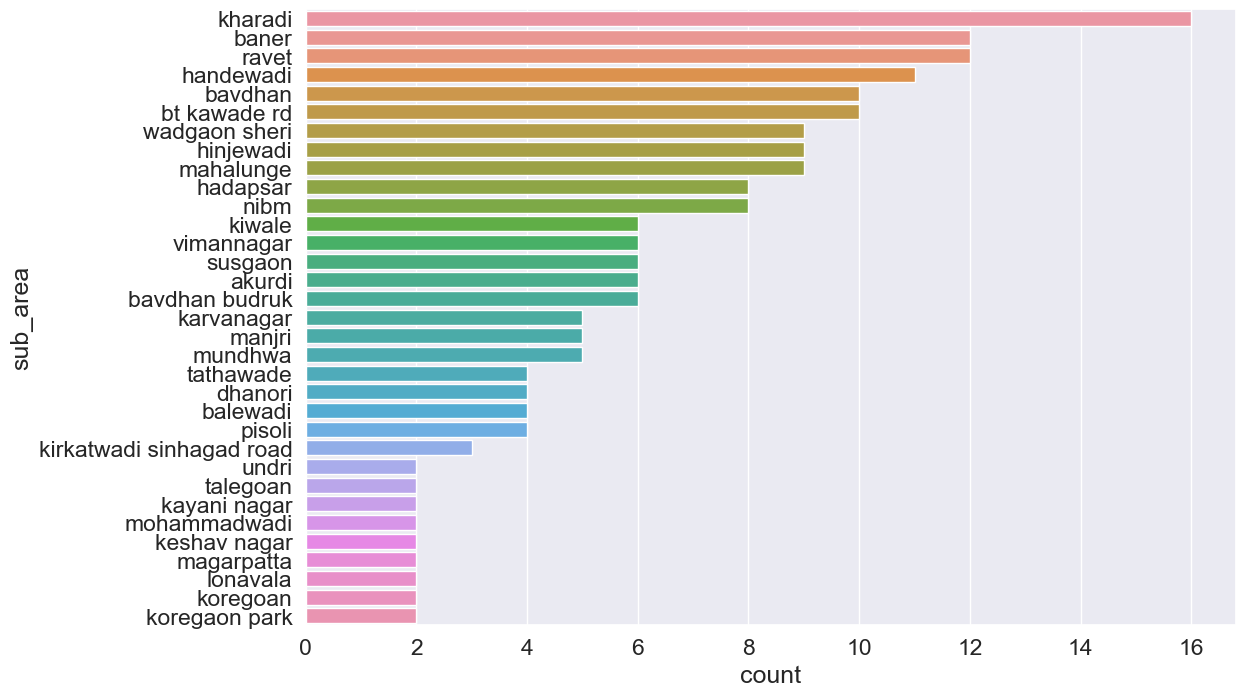

In [67]:
# Distribution of sub-areas contribution 
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_sa_count, x="count", y="sub_area", ax=ax)
plt.show()

In [68]:
len(df_sa_count), np.mean(df_sa_count["count"])

(33, 5.9393939393939394)

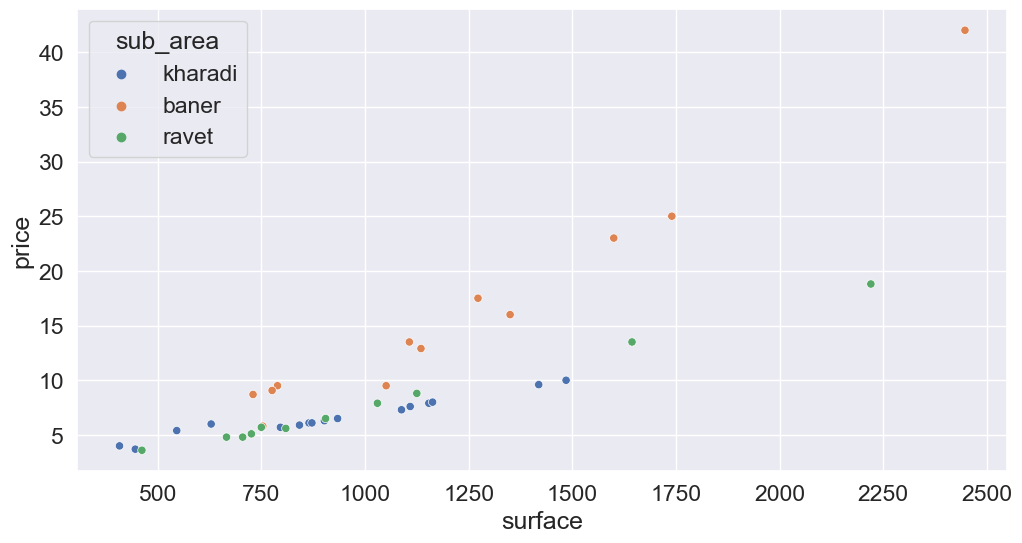

In [69]:
# Price vs surface for the first three most contribuions
fig, ax = plt.subplots(figsize=(12, 6))
df_plot = df_sa_count.merge( df[["sub_area", "surface", "price"]], on="sub_area")
df_plot = df_plot[df_plot["count"]>11]

sns.scatterplot(data=df_plot, x="surface", y="price", hue="sub_area")
plt.show()

In [70]:
# Feature engineering
sa_sel_col = df_sa_count.loc[df_sa_count["count"]>7, "sub_area"].to_list()
df["sub_area"] = df["sub_area"].where(df["sub_area"].isin(sa_sel_col), "other")

In [71]:
df["sub_area"].unique(), len(df["sub_area"].unique())

(array(['bavdhan', 'mahalunge', 'other', 'ravet', 'baner', 'kharadi',
        'hadapsar', 'handewadi', 'nibm', 'bt kawade rd', 'hinjewadi',
        'wadgaon sheri'], dtype=object),
 12)

#### Converting Sub-Area to dummy variables

In [72]:
# Dummy variable conversion
hoten = OneHotEncoder(sparse_output=False) #sparse has been changed to sparse_output
X_dummy = hoten.fit_transform( df[["sub_area"]] )
X_dummy.shape, X_dummy, X_dummy.dtype

((196, 12),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 dtype('float64'))

In [73]:
# Type conversion
X_dummy = X_dummy.astype("int64")

In [74]:
# Adding the dummy columns to the dataset
sa_cols_name = ["sa"+str(i+1) for i in range(X_dummy.shape[1])]
df.loc[:,sa_cols_name] = X_dummy
df.head()

C:\Users\Joseph\AppData\Local\Temp\ipykernel_35120\945024865.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,sa_cols_name] = X_dummy


,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,bavdhan,1.0,492.0,3.9,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
1,bavdhan,2.0,774.0,6.5,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,bavdhan,3.0,889.0,7.4,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
3,bavdhan,3.0,1018.0,8.9,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
4,mahalunge,2.0,743.0,7.4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0


In [75]:
# Sub_area and dummy columns relationship 
df[["sub_area"]+sa_cols_name].drop_duplicates()\
            .sort_values("sub_area").reset_index(drop=True)

,sub_area,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,baner,1,0,0,0,0,0,0,0,0,0,0,0
1,bavdhan,0,1,0,0,0,0,0,0,0,0,0,0
2,bt kawade rd,0,0,1,0,0,0,0,0,0,0,0,0
3,hadapsar,0,0,0,1,0,0,0,0,0,0,0,0
4,handewadi,0,0,0,0,1,0,0,0,0,0,0,0
5,hinjewadi,0,0,0,0,0,1,0,0,0,0,0,0
6,kharadi,0,0,0,0,0,0,1,0,0,0,0,0
7,mahalunge,0,0,0,0,0,0,0,1,0,0,0,0
8,nibm,0,0,0,0,0,0,0,0,1,0,0,0
9,other,0,0,0,0,0,0,0,0,0,1,0,0


#### Univariate and bivariate analyses

In [76]:
# check only object datatype columns
data = df.select_dtypes(exclude="object")

In [77]:
data.head()

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,1.0,492.0,3.9,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
1,2.0,774.0,6.5,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,3.0,889.0,7.4,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
3,3.0,1018.0,8.9,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
4,2.0,743.0,7.4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0


In [78]:
data.describe()

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,2.385204,893.321429,8.698673,0.739796,0.030612,0.030612,0.030612,0.979592,0.632653,0.806122,0.061224,0.051020,0.051020,0.040816,0.056122,0.045918,0.081633,0.045918,0.040816,0.418367,0.061224,0.045918
std,0.847824,376.080650,5.807492,0.439869,0.172706,0.172706,0.172706,0.141754,0.483317,0.396346,0.240356,0.220603,0.220603,0.198371,0.230747,0.209844,0.274505,0.209844,0.198371,0.494554,0.240356,0.209844
min,1.000000,113.000000,1.319000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,670.000000,5.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,794.500000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1041.250000,9.746750,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,6.000000,2447.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Continous variables

Create a pairwise scatter plot between all the float columns in a dataset. The visualization produced by this code allows the user to observe the correlation between different features and gain insights into how they relate to one another. This can help in identifying patterns, trends, or outliers in the data, which can in turn be used to make informed business decisions

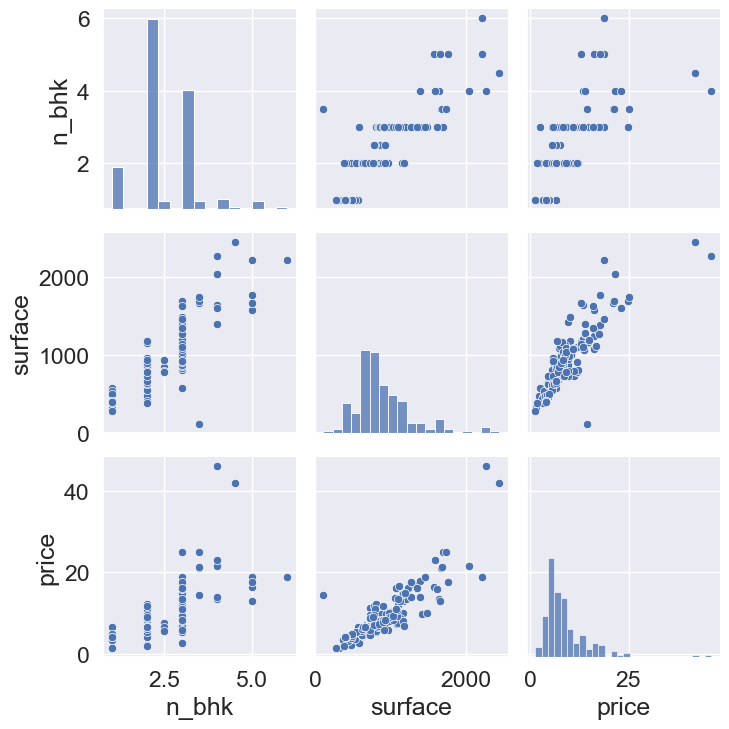

In [79]:
float_cols = data.select_dtypes( include="float" ).columns.to_list()
sns.pairplot( data[float_cols] )
plt.show()

#### Binary variables

Creating a grid of subplots to plot histograms of binary variables in the dataset. It is looping through each binary variable in the binary_cols list, plotting a histogram of the variable's values as percentages, and placing the plot in one of the subplots in the grid. The purpose of this code is to visualize the distribution of the binary variables in the dataset, which can help in understanding the data and identifying potential issues such as imbalanced classes or sparse features.

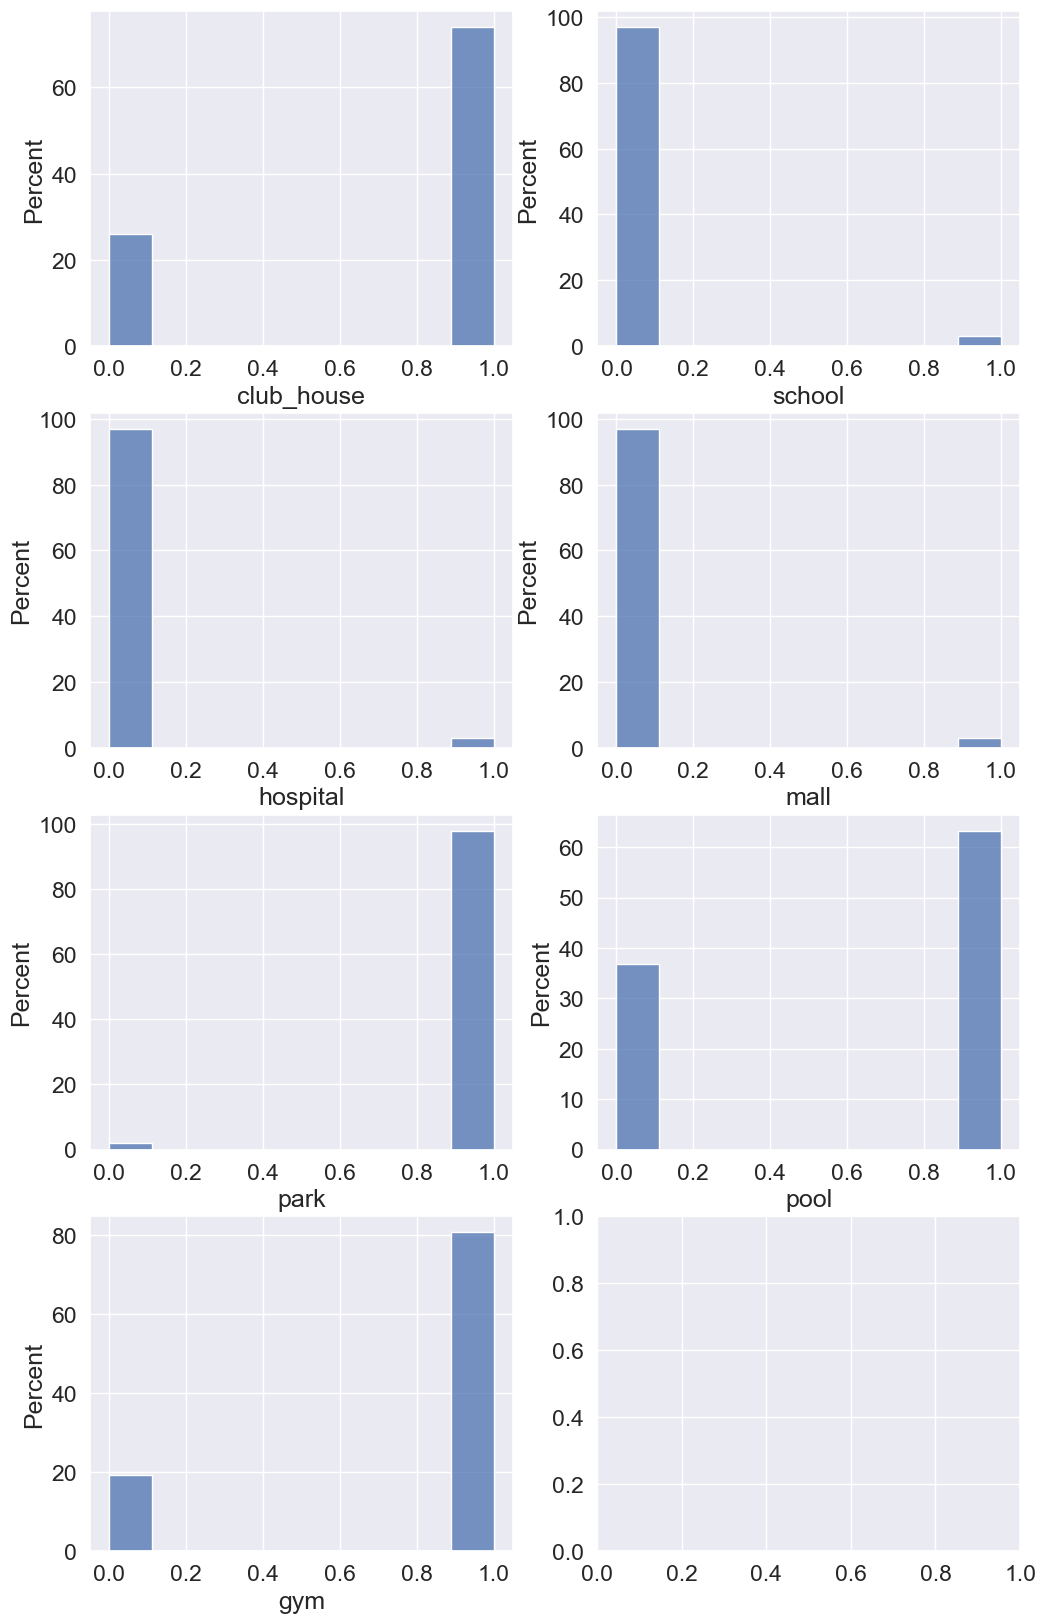

In [80]:
fig, ax = plt.subplots(4,2, figsize=(12,20))
for i, col in enumerate(binary_cols):
    sns.histplot(data, x=col, ax=ax[int(i/2), i%2], stat="percent")

#### Correlation map

Generate a correlation matrix heatmap between the selected float and binary columns of the dataset. The heatmap visually displays the strength and direction of the linear relationship between pairs of variables. The diagonal represents the correlation of each variable with itself (which is always 1), while the off-diagonal cells show the correlation between pairs of variables. The darker colors indicate stronger correlation, while the lighter colors indicate weaker correlation or lack of correlation. The heatmap is useful in identifying highly correlated variables, which may be candidates for further feature engineering or dimensionality reduction techniques to reduce the risk of multicollinearity in statistical models.

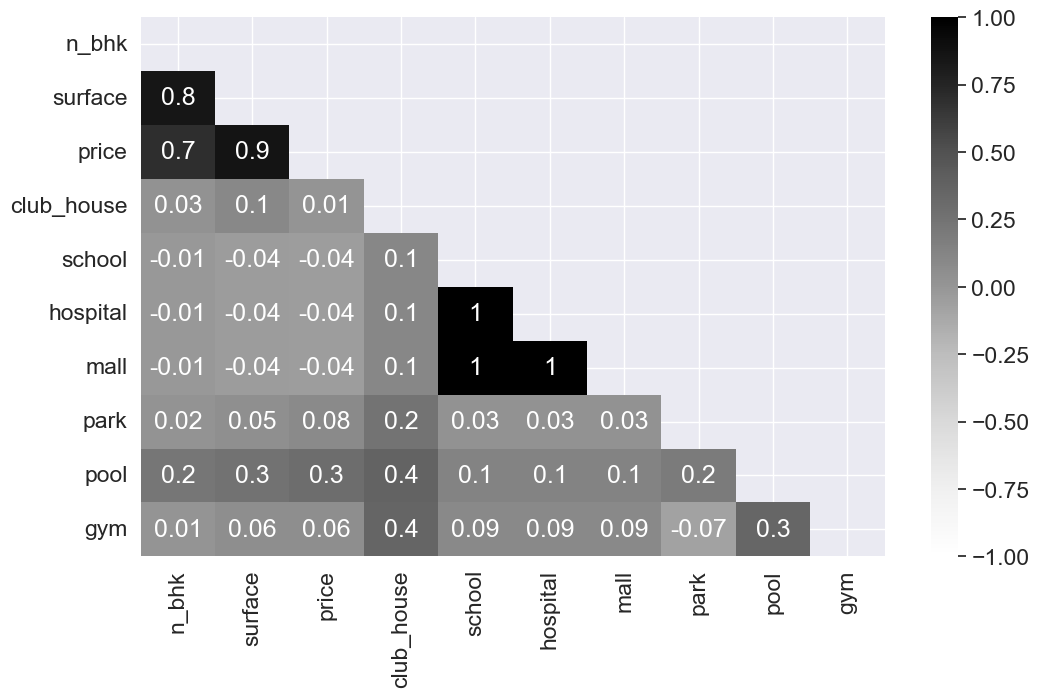

In [81]:
corr_cols_list = float_cols+binary_cols
correl = data[corr_cols_list].corr()
mask = np.zeros_like(correl )

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots( figsize=(12,7) )
sns.heatmap(correl, mask=mask, vmin=-1, cmap='Greys', 
            annot=True, fmt='.1g')
plt.show()

#### Feature selection

Calculate the correlation coefficient between the "price" column and all other columns (except for those specified in "sa_cols_name") in a given dataset. The correlation coefficient is a statistical measure that quantifies the strength and direction of the linear relationship between two variables, where a value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

In [82]:
# Price correlation with all other columns
corr_cols_list.remove("price")
corr_cols_list.extend(sa_cols_name)
corr_list = [] # to keep the correlations with price
for col in corr_cols_list:
    corr_list.append( round(data["price"].corr(data[col]),2) )    

corr_list

[0.7,
 0.86,
 0.01,
 -0.04,
 -0.04,
 -0.04,
 0.08,
 0.29,
 0.06,
 0.32,
 -0.12,
 0.08,
 -0.04,
 -0.17,
 0.0,
 -0.11,
 -0.05,
 0.23,
 -0.02,
 -0.0,
 -0.07]

In [83]:
# Sorted correlations
df_corr = pd.DataFrame( data=zip(corr_cols_list, corr_list), 
                 columns=["col_name", "corr"] )\
            .sort_values("corr", ascending=False)\
            .reset_index(drop=True)
df_corr

,col_name,corr
0,surface,0.86
1,n_bhk,0.70
2,sa1,0.32
3,pool,0.29
4,sa9,0.23
5,sa3,0.08
6,park,0.08
7,gym,0.06
8,club_house,0.01
9,sa11,-0.00


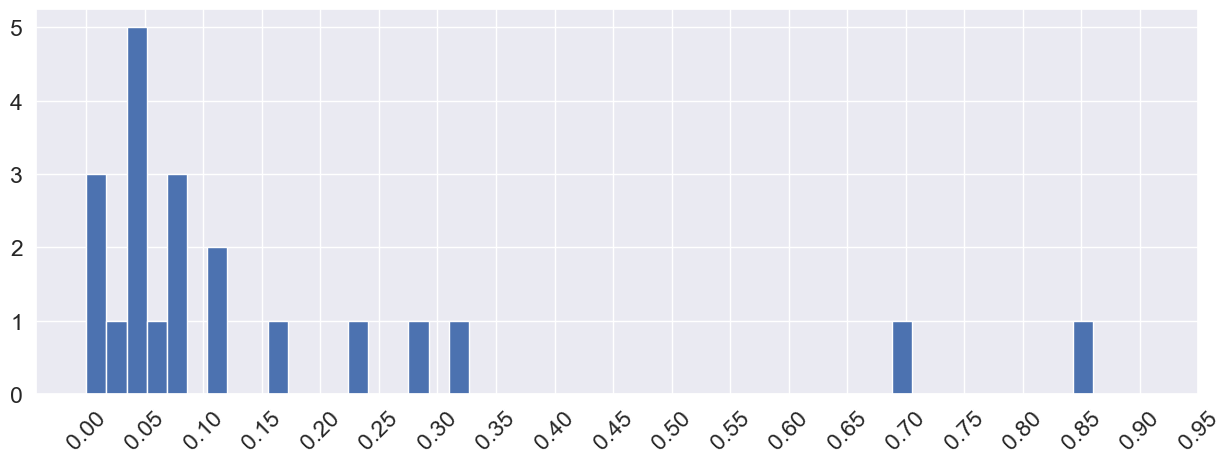

In [84]:
# Distribution of correlations with price 
fig, ax = plt.subplots(figsize=(15,5))
abs(df_corr["corr"]).hist(bins=50)
ax.set_xticks(np.arange(0, 1, 0.05))
plt.xticks(rotation=45)
plt.show()

In [85]:
features = df_corr.loc[abs(df_corr["corr"])>.1, "col_name"].to_list() 
features, len(features)

(['surface', 'n_bhk', 'sa1', 'pool', 'sa9', 'sa7', 'sa2', 'sa5'], 8)

In [86]:
# Keeping the sub areas' name, their mean price and frequency (count)
sa_feature_list = [sa for sa in features if "sa" in sa]
lst = []
for col in sa_feature_list:
    sa_triger = df[col]==1
    sa = df.loc[sa_triger, "sub_area"].to_list()[0]
    x = df.loc[sa_triger, "price"]
    lst.append( (sa, np.mean(x), df[col].sum()) )

lst

[('baner', 16.038999999999998, 12),
 ('nibm', 15.1, 8),
 ('kharadi', 6.6310625000000005, 16),
 ('bavdhan', 5.804400000000001, 10),
 ('handewadi', 4.568818181818181, 11)]

In [87]:
# sub area mean price comparision 
sa_f = pd.DataFrame(lst, columns=["sub_area","mean_price", "count"])
sa_f["total_mean_price"] = np.mean(df["price"])
sa_f

,sub_area,mean_price,count,total_mean_price
0,baner,16.039000,12,8.698673
1,nibm,15.100000,8,8.698673
2,kharadi,6.631063,16,8.698673
3,bavdhan,5.804400,10,8.698673
4,handewadi,4.568818,11,8.698673


#### Data scalling

In [88]:
# Selection the final dataset
sel_data = data[features+["price"]].copy()
sel_data.head()

,surface,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,492.0,1.0,0,1,0,0,1,0,3.9
1,774.0,2.0,0,1,0,0,1,0,6.5
2,889.0,3.0,0,1,0,0,1,0,7.4
3,1018.0,3.0,0,1,0,0,1,0,8.9
4,743.0,2.0,0,1,0,0,0,0,7.4


In [89]:
# Standard scaling for surface
sc = StandardScaler(with_std=True, with_mean=True)
sel_data["surface"] = sc.fit_transform(sel_data[["surface"]])

In [90]:
# Showing the final datset
sel_data

,surface,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,-1.069848,1.0,0,1,0,0,1,0,3.900
1,-0.318089,2.0,0,1,0,0,1,0,6.500
2,-0.011520,3.0,0,1,0,0,1,0,7.400
3,0.332370,3.0,0,1,0,0,1,0,8.900
4,-0.400729,2.0,0,1,0,0,0,0,7.400
5,0.217740,3.0,0,1,0,0,0,0,9.500
6,0.003142,2.0,0,1,0,0,0,0,7.500
7,0.749570,3.0,0,1,0,0,0,0,10.000
8,0.031133,2.0,0,1,0,0,0,0,6.500
9,0.617612,3.0,0,1,0,0,0,0,8.800


#### Saving the data

In [91]:
# save the new data
sel_data.to_csv("Read_features.csv", index=False)

## Modeling Data

In [92]:
# import the required libraries
#time is used for timing code execution.
#matplotlib.pyplot is a plotting library used to create visualizations.
#SVR, KNeighborsRegressor, RandomForestRegressor, LinearRegression, Ridge, Lasso, and ElasticNet are all machine learning models for regression tasks.
#train_test_split is a function for splitting data into training and testing sets.
#GridSearchCV is a function for performing a grid search to find the best hyperparameters for a model.
#LeaveOneOut is a function for cross-validating by leaving one observation out at a time.
#r2_score and mean_squared_error are metrics for evaluating the performance of regression models.

from time import time
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error

In [93]:
!pip install xgboost

In [94]:
import xgboost as xgb

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
sns.set(font_scale=1.5)

In [97]:
# read the final csv data 
data = pd.read_csv("Read_features.csv")
data.shape

(196, 9)

In [98]:
data.describe()

,surface,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
count,1.960000e+02,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,6.797284e-17,2.385204,0.061224,0.632653,0.040816,0.081633,0.051020,0.056122,8.698673
std,1.002561e+00,0.847824,0.240356,0.483317,0.198371,0.274505,0.220603,0.230747,5.807492
min,-2.080191e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.319000
25%,-5.953332e-01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.100000
50%,-2.634395e-01,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,3.943500e-01,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.746750
max,4.141817e+00,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000


#### Data Preparation

In [99]:
data = data.sort_values("surface").reset_index(drop=True)

In [100]:
# Selecting the feature matrix and target vector
X = data.iloc[:, :-1]
y = data["price"]

In [101]:
# Random sate for data splitting
rs = 118
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3, random_state=rs) 

Visualize and assess the quality of a machine learning model's predictions on a set of data. Specifically, if it plots the difference between the actual value and the predicted value (known as the "residuals") against a particular feature variable ("surface") in the data. This can help identify patterns or trends in the residuals, which may indicate areas where the model is performing well or poorly.

In [102]:
# function for performing grid search
def gridSearchReport( estimator, X, y, pg, cv=LeaveOneOut(), rs=118 ):
    """
    Performs the grid search and cross validation for the given regressor.
    Params:
        estimator:  the regressor
        X: Pandas dataframe, feature data
        y: Pandas series, target
        pg: dict, parameters' grid
        cv: int, cross-validation generator or an iterable, cross validation folds
        rs: int, training-test split random state
    """    

    t0 = time()
    
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=rs) # train tets split
    
    est_cv = GridSearchCV(
        estimator, 
        param_grid=pg, 
        scoring="neg_mean_squared_error", 
        n_jobs=-1, 
        cv=cv
       )
    
    est_cv.fit(X_train, y_train)
    
    print("Best parameters:", est_cv.best_params_) # best parameters
    print("Best CV score:", abs(est_cv.best_score_)) # cross validation score
    y_train_pred, y_test_pred = est_cv.predict(X_train), est_cv.predict(X_test) # predictions on train and test data
    print("MSE, R2 train:", mean_squared_error(y_train, y_train_pred),  # evaluation metrics
          ", ", r2_score(y_train, y_train_pred) )
    print("MSE, R2 test:", mean_squared_error(y_test, y_test_pred),
          ", ", r2_score(y_test, y_test_pred) )
    
    t = round(time()-t0, 2)
    print("Elapsed time:", t, "s ,", round(t/60, 2), "min")
    
    return est_cv

In [103]:
# function to plot the residuals
def plotResidue(estimator, X, y, rs=118):
    """
    Plots the fit residuals (price - predicted_price) vs. "surface" variable.
    Params:
        estimator: GridSearchCV, the regressor
        X: Pandas dataframe, feature data
        y: Pandas series, target
        rs: int, random state
    """    
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=rs) # train tets split

    residue_train = y_train-estimator.predict(X_train) # make predictions
    residue_test = y_test-estimator.predict(X_test)                                                     
                                                          
    fig, axe = plt.subplots(1, 2, figsize=(18,10)) 
    axe[0].scatter( X_train["surface"], residue_train, label="train" )
    axe[0].scatter( X_test["surface"], residue_test, label="test" )
    axe[0].plot( [-2.3, 4.5], [0,0], "black" )
    axe[0].set_xlabel("Scaled surface")
    axe[0].set_ylabel("Fit residulas")
    axe[0].legend()
    
    axe[1].hist(residue_test, bins=25)
    axe[1].set_xlabel("Fit residual for test set")
    axe[1].set_ylabel("Count")


    plt.show()

    print("mean residuals:", round(np.mean(residue_test), 2),
          "\nstd:", round(np.std(residue_test), 2))

#### Ordinary Linear Regression

In [104]:
# define a simple linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [105]:
# check for the r2 score on train and tets data
r2_score(y_train, lr.predict(X_train)),\
r2_score(y_test, lr.predict(X_test))

(0.7799739568303908, 0.7418384969671956)

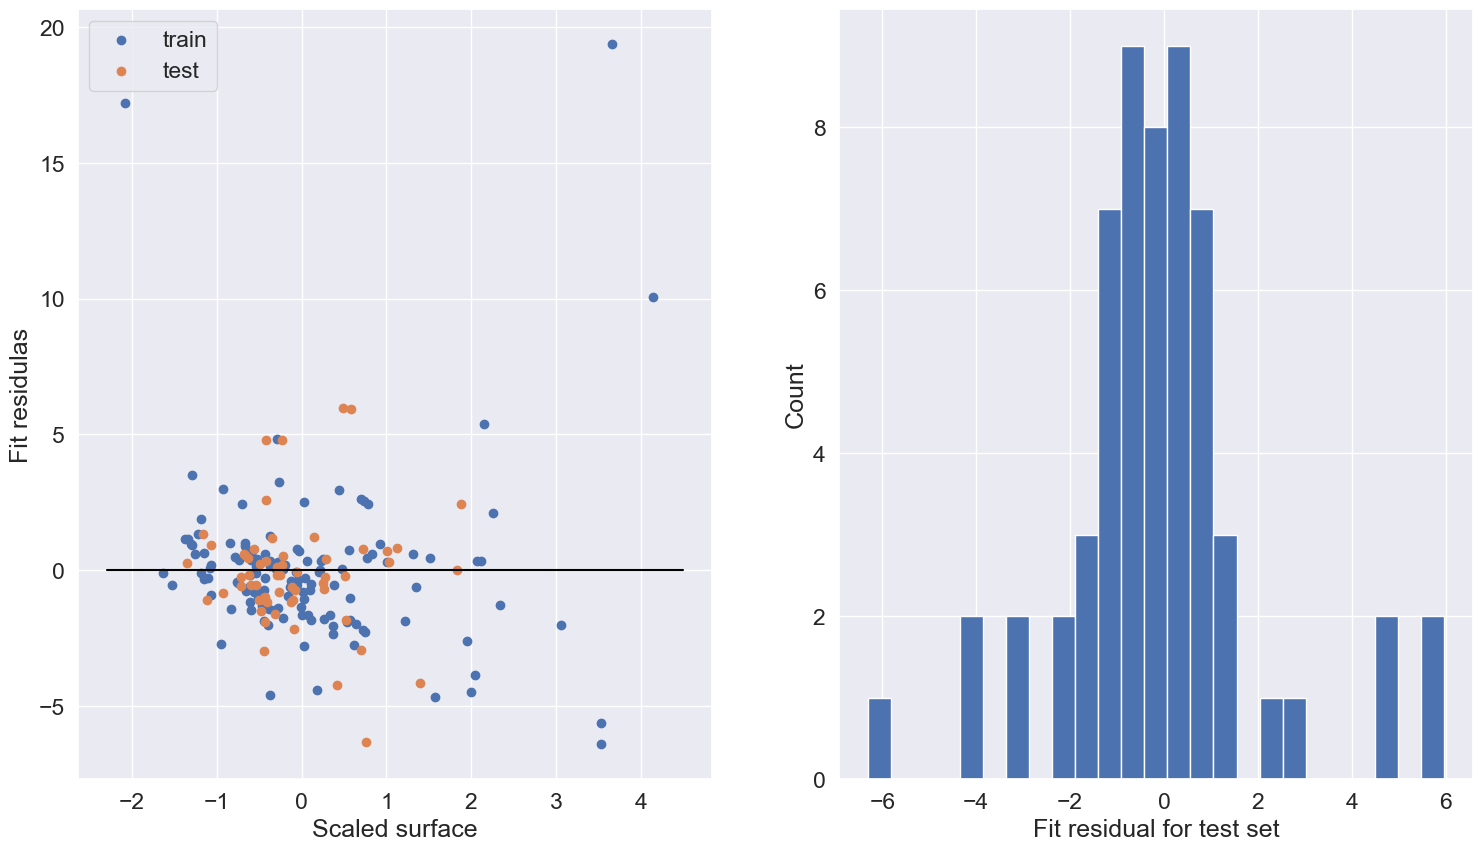

mean residuals: -0.1 
std: 2.1


In [106]:
# plot the residuals
plotResidue(lr, X, y, rs=rs)

#### Ridge Regression

Train a machine learning model for performing ridge regression on a set of data. Ridge regression is a type of regression analysis used to model the relationship between a dependent variable and one or more independent variables. The purpose of this code is to explore different values of the regularization parameter (alpha) for the ridge regression model and identify the optimal value that results in the best model performance. 

In [107]:
# define the parameters for ridge regression model and check for the grid search 
alphas = np.logspace(-3,3,100)
pg = {"alpha":alphas}
ridge = Ridge()
ridg_cv = gridSearchReport( ridge, X, y, pg, rs=rs )

Best parameters: {'alpha': 10.0}
Best CV score: 11.800965273439637
MSE, R2 train: 9.43130688285795 ,  0.7665017863457696
MSE, R2 test: 4.541416900617871 ,  0.7347753550464851
Elapsed time: 11.38 s , 0.19 min


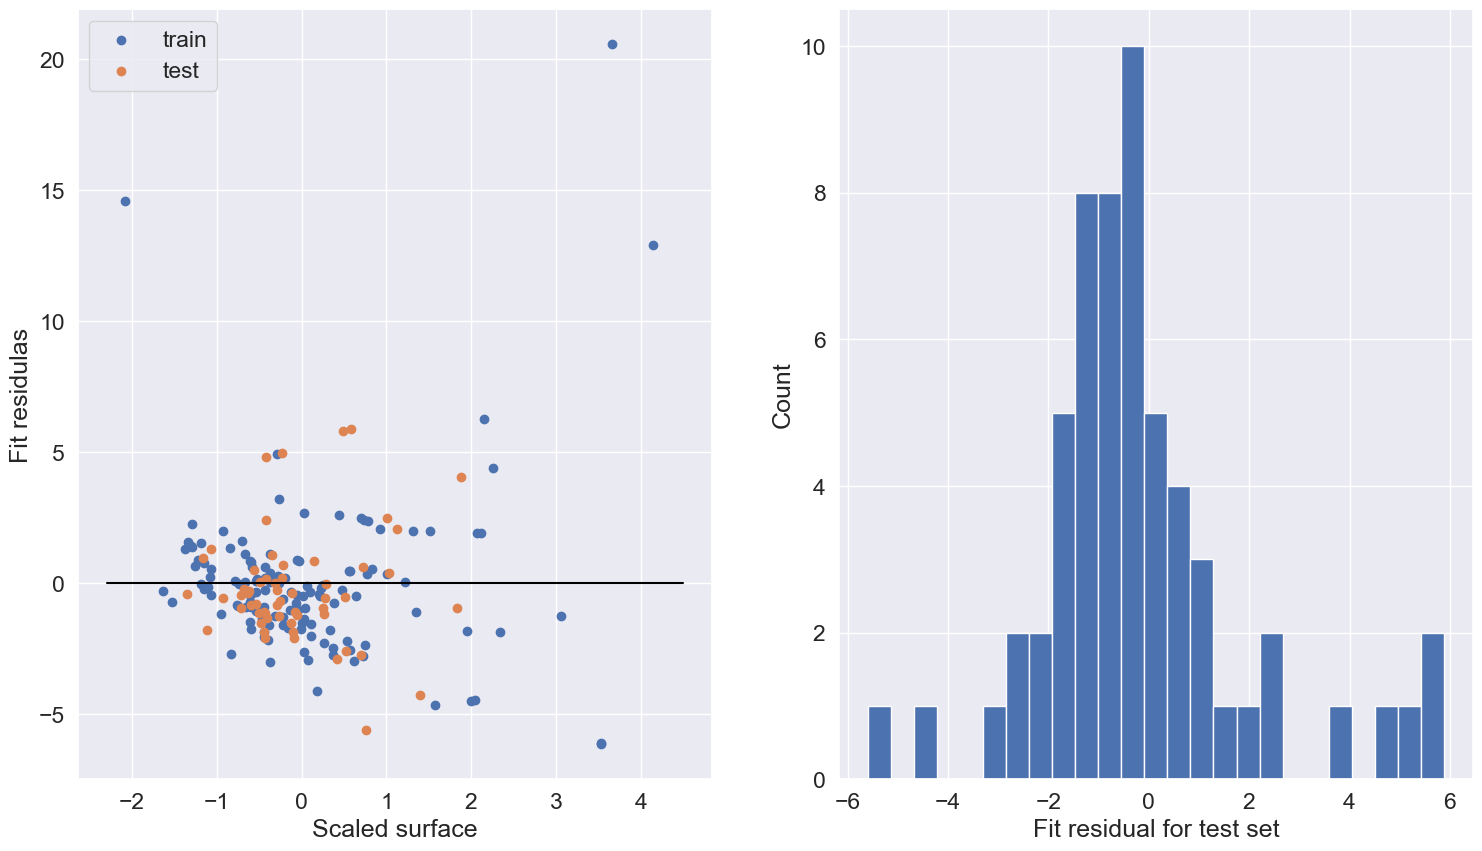

mean residuals: -0.19 
std: 2.12


In [108]:
# plot the residuals
plotResidue(ridg_cv, X, y, rs)

#### Lasso Regression
Lasso regression is a machine learning technique used for predicting a target variable based on a set of input features, similar to other regression techniques such as linear regression or ridge regression

In business terms, lasso regression can be useful for identifying the most important factors that contribute to a particular outcome, such as customer churn or product sales. By analyzing historical data and training a lasso regression model, businesses can identify the most relevant features that affect the outcome of interest and use this information to inform their decision-making. Lasso regression can also help businesses reduce costs and improve efficiency by eliminating unnecessary or redundant features that do not contribute to the prediction of the outcome.

In [109]:
#define the parameters and plot the lasso regression model
#creates an instance of the Lasso regression model and defines a grid of alpha 
#values to search over using a dictionary of parameters (pg). The alpha parameter 
#controls the strength of the penalty term in the model, which determines how 
#much the coefficients of the features will be shrunk towards zero.
lasso = Lasso()
pg = {"alpha":alphas}
lasso_cv = gridSearchReport( lasso, X, y, pg, rs=rs )

Best parameters: {'alpha': 0.3511191734215131}
Best CV score: 11.639635858092893
MSE, R2 train: 10.336902819264557 ,  0.7440812420808165
MSE, R2 test: 5.3672739684261135 ,  0.6865442297423996
Elapsed time: 10.56 s , 0.18 min


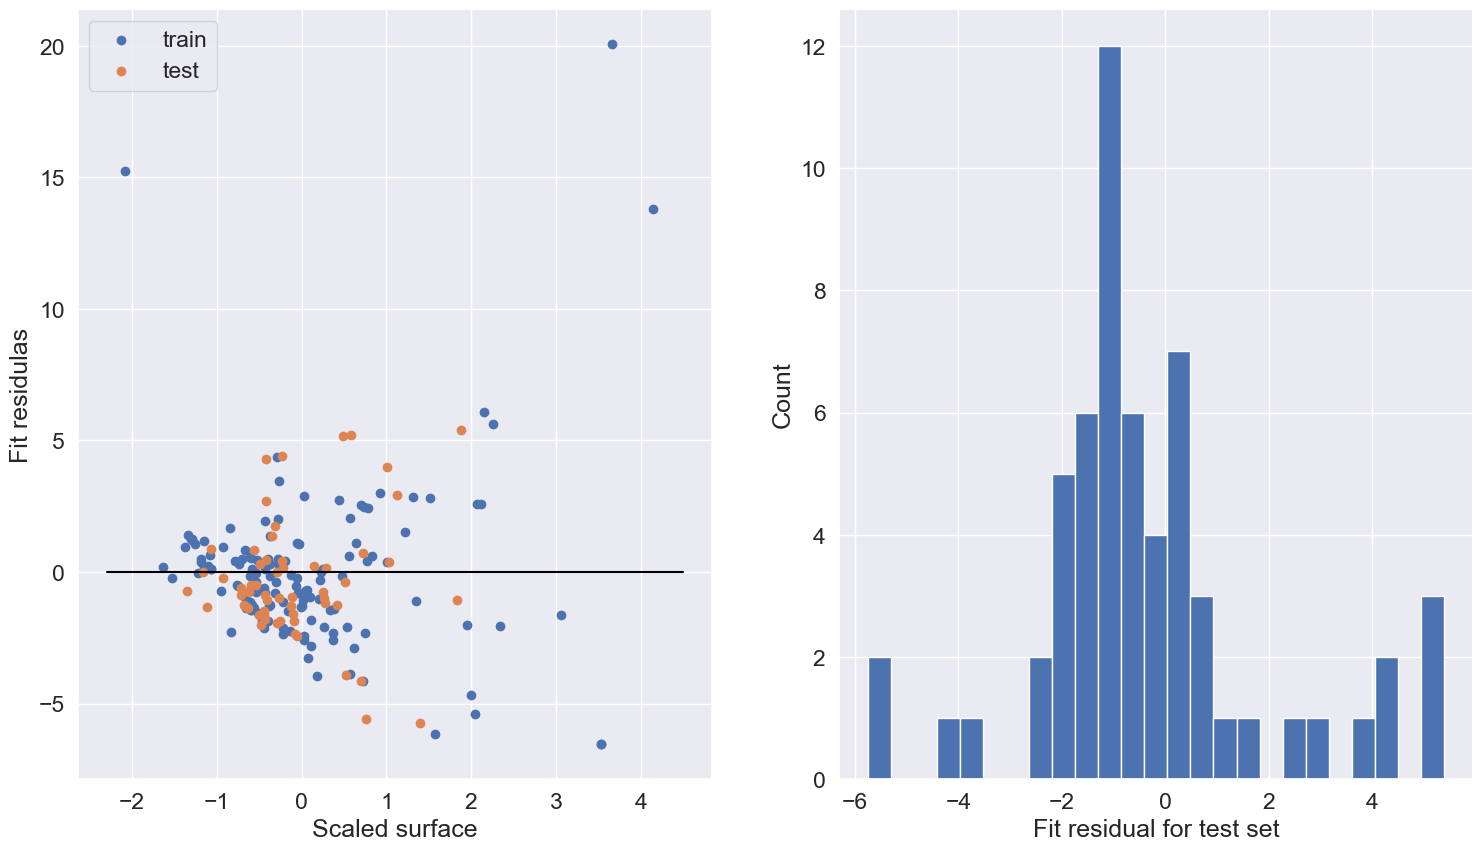

mean residuals: -0.31 
std: 2.3


In [110]:
# plot the residuals 
plotResidue(lasso_cv, X, y, rs=rs)

#### Lasso and Ridge Combination

Train a machine learning model using ElasticNet regression on a set of data. ElasticNet regression is a technique that combines the L1 and L2 regularization methods to overcome the limitations of each method. The L1 regularization can result in sparse models with some coefficients set to zero, while the L2 regularization can lead to overfitting.

In [111]:
# define an elasticnet model 
l1_ratio = np.random.rand(20)
elastic = ElasticNet()
pg = {"alpha":np.linspace(0.1,1,5), "l1_ratio":l1_ratio}
elastic_cv = gridSearchReport( elastic, X, y, pg, rs=rs )

Best parameters: {'alpha': 0.325, 'l1_ratio': 0.963296220477347}
Best CV score: 11.641128350610993
MSE, R2 train: 10.347284598199321 ,  0.7438242122899371
MSE, R2 test: 5.372972254006881 ,  0.686211442464095
Elapsed time: 12.11 s , 0.2 min


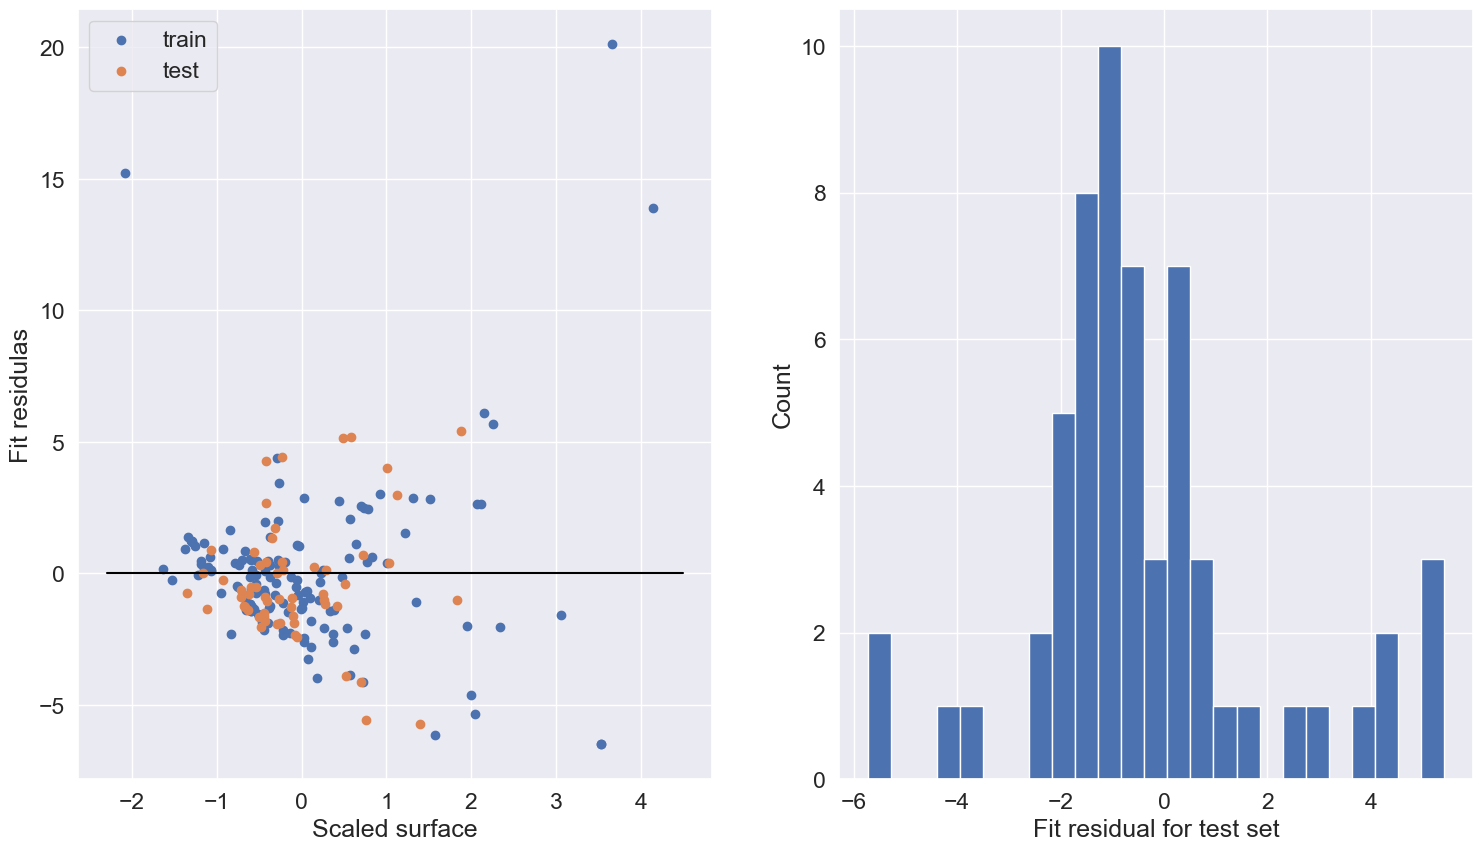

mean residuals: -0.32 
std: 2.3


In [112]:
# plot the residuals
plotResidue(elastic_cv, X, y, rs=rs)

#### Random Forest Regressor

Random Forest Regressor is a type of ensemble learning model that combines multiple decision tree regressors to improve the accuracy and robustness of the predictions. The importance of Random Forest Regressor modeling can be explained in the following points:

Accuracy: Random Forest Regressor is known for its high accuracy in predicting continuous values, especially in cases where the relationships between the features and target variable are complex or non-linear. This is because the model uses multiple decision trees, each trained on a random subset of the features, to capture different aspects of the data and minimize the impact of any individual tree's biases.

Robustness: Random Forest Regressor is also known for its robustness, as it is less susceptible to overfitting than a single decision tree or other linear models. This is because the model is less likely to memorize the training data and instead focuses on capturing the general patterns in the data.

Feature Importance: Random Forest Regressor also provides a measure of feature importance, which can help in feature selection and interpretation of the model. The feature importance score is calculated based on how much each feature contributes to the reduction in the variance of the predictions, and can be used to identify the most important features for making accurate predictions.

Scalability: Random Forest Regressor can also be scaled easily to handle large datasets, as each tree can be trained independently on a subset of the data. This makes it a popular choice for data scientists and machine learning practitioners who need to work with large datasets.

Define the random forest regression model and performs a grid search to find the optimal hyperparameters for the model. The purpose of this code is to create a model that can accurately predict the target variable based on the features in the dataset.

In [113]:
# define a random forest regression model 
rfr = RandomForestRegressor( random_state=10 )
pg = {"n_estimators":[10, 20, 30, 50],
         "criterion":["squared_error", "absolute_error", "poisson"],
         "max_depth":[2,3,4],
         "min_samples_split":range(2, 10),
         "min_samples_leaf":[2,3],
         "max_features":range(4, X_train.shape[1]+1) 
        }
rfr_cv = gridSearchReport( rfr, X, y, pg, cv=5, rs=rs )

Best parameters: {'criterion': 'poisson', 'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
Best CV score: 9.534618847932967
MSE, R2 train: 4.8584989409685075 ,  0.8797143558313154
MSE, R2 test: 5.647659109141971 ,  0.6701693733872196
Elapsed time: 172.08 s , 2.87 min


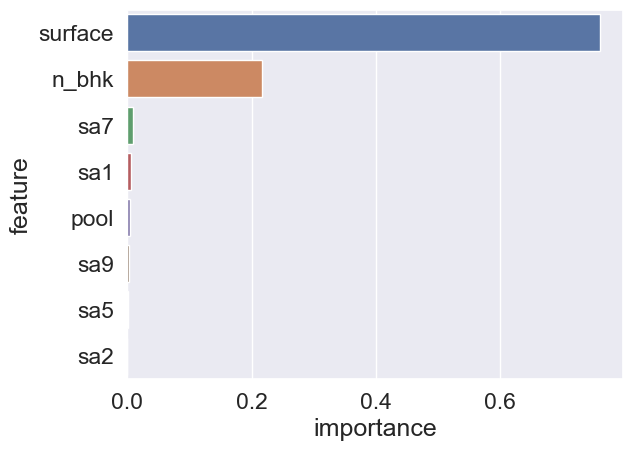

In [114]:
# find the best features 
rfr = rfr_cv.best_estimator_
df_imp = pd.DataFrame(zip(X.columns, rfr.feature_importances_))
df_imp.columns = ["feature", "importance"]
df_imp = df_imp.sort_values("importance", ascending=False).reset_index(drop=True)

sns.barplot(data=df_imp, x="importance", y="feature")
plt.show()


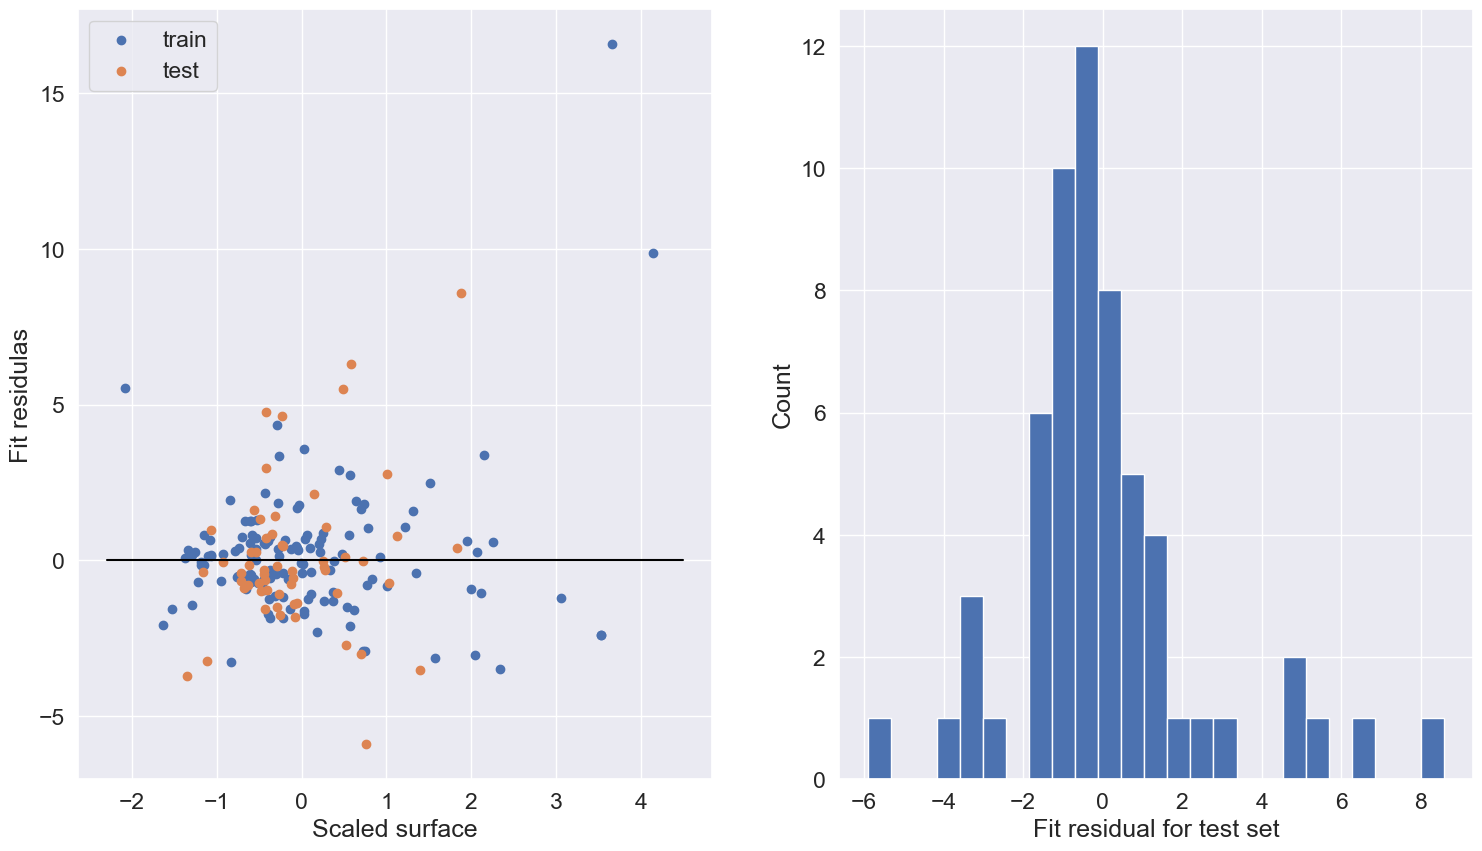

mean residuals: 0.05 
std: 2.38


In [115]:
# plot the residuals
plotResidue(rfr_cv, X, y, rs=rs)

#### XGboost (extreme gradient boosting)

XGBoost (Extreme Gradient Boosting) is a machine learning algorithm used for supervised learning tasks, including classification and regression. The importance of XGBoost modeling can be explained in the following points:

Accuracy: XGBoost is known for its high accuracy in predicting both categorical and continuous target variables. It works by iteratively training a sequence of decision tree models that correct the errors of the previous model, which results in a highly accurate final model.

Speed: XGBoost is designed to be highly optimized for speed and efficiency, making it a popular choice for large-scale datasets with many features. It is able to take advantage of parallel computing resources to speed up the training process and handle large datasets with ease.

Regularization: XGBoost includes built-in regularization techniques that help prevent overfitting and improve generalization performance. These techniques include L1 and L2 regularization, as well as a sparsity-aware algorithm that can handle datasets with many missing values.

Feature Importance: XGBoost provides a measure of feature importance, which can help in feature selection and interpretation of the model. The feature importance score is calculated based on how much each feature contributes to the reduction in the loss function, and can be used to identify the most important features for making accurate predictions.

Flexibility: XGBoost is highly flexible and can be used for a wide range of supervised learning tasks, including regression, classification, and ranking. It is also compatible with a variety of programming languages, including Python, R, Java, and C++.

In [116]:
# define the parameters for XGBoost model
from scipy.stats import uniform
param_grid = {'max_depth':range(2,7),
      'gamma':uniform(loc=0.0, scale=3), # minimum of the loss function rduction to split a node
      'min_child_weight':range(3,6), # similar to min_samples_leaf
      'colsample_bytree':uniform(loc=0.1, scale=0.9), # similar to the max_features
      'subsample':uniform(loc=0.5, scale=0.5), # similar to bootstraping in RF
      'learning_rate':uniform(loc=0.01, scale=0.99)} # contriburion rate of each estimator

In [117]:
from sklearn.model_selection import ParameterSampler
rng = np.random.RandomState(20)
n_iter=500
param_list = list(ParameterSampler(param_grid, n_iter=n_iter,
                                   random_state=rng))

In [118]:
param_list[0]

{'colsample_bytree': 0.6293177209695467,
 'gamma': 2.6931411837282537,
 'learning_rate': 0.8926154221799609,
 'max_depth': 3,
 'min_child_weight': 3,
 'subsample': 0.5179447928084266}

In [119]:
# function to perform cross validation
from sklearn.model_selection import KFold

def cross_validate( est, Xn, yn, n_fold=10 ):
    """
    Cross validation for XGB fit.
    Params:
        est: xgb regressor
        Xn: numpy array (n_sample, n_feature)
            Training feature matrix
        yn: numpy array (n_sample,)
            Training target vector
        n_fold: int
            number of folds for cross validating
    """
    kf = KFold(n_splits=n_fold, shuffle=True, random_state=0)
    mean_train_error, mean_val_error = 0., 0.
    for train_index, val_index in kf.split(Xn, yn):
        est.fit(Xn[train_index], yn[train_index], 
                    eval_set=[(Xn[train_index], yn[train_index]), 
                              (Xn[val_index], yn[val_index])],
                    eval_metric='rmse',
                    verbose=False, 
                    early_stopping_rounds=30)
        mean_val_error += mean_squared_error(yn[val_index], est.predict(Xn[val_index]))
        mean_train_error += mean_squared_error(yn[train_index], est.predict(Xn[train_index]))

    return mean_train_error/n_fold, mean_val_error/n_fold

In [120]:
%%time
xgbr = xgb.XGBRegressor( objective='reg:squarederror', n_estimators=1000, verbosity=1 ) # XGBoost model

val_score, train_score = [], []
counter = 0
for param_grid in param_list:
    xgbr.set_params(**param_grid)
    train_error, val_error = cross_validate(xgbr, X_train.values, y_train.values)  
    val_score.append(val_error)
    train_score.append(train_error)
    
    if counter%50 == 0 :
        print("iter =", counter, 
              "train_score=", train_score[counter], ", ", 
              "val_score=", val_score[counter])
    counter += 1
        

iter = 0 train_score= 7.447880982571091 ,  val_score= 7.3961216857366425
iter = 50 train_score= 7.393488895628314 ,  val_score= 10.111414108909706
iter = 100 train_score= 7.015672187669996 ,  val_score= 9.61799161333593
iter = 150 train_score= 7.935163982827814 ,  val_score= 11.729026263678366
iter = 200 train_score= 9.561178498803688 ,  val_score= 9.857760469278594
iter = 250 train_score= 5.7744706299106925 ,  val_score= 8.805357406001242
iter = 300 train_score= 7.4099119075871185 ,  val_score= 10.89380628482678
iter = 350 train_score= 8.128550472169133 ,  val_score= 9.924288003577775
iter = 400 train_score= 12.688177214993129 ,  val_score= 11.762396246629335
iter = 450 train_score= 9.78477444189773 ,  val_score= 11.664134604745701
CPU times: total: 19min 2s
Wall time: 3min 22s


In [121]:
df_grid = pd.DataFrame(param_list)
df_grid["train_score"] = train_score
df_grid["val_score"] = val_score
df_grid

,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,subsample,train_score,val_score
0,0.629318,2.693141,0.892615,3,3,0.517945,7.447881,7.396122
1,0.722582,1.136043,0.523326,4,5,0.596925,8.106135,9.827308
2,0.345085,2.155818,0.785174,3,4,0.887622,8.768164,12.701673
3,0.132998,0.350081,0.753768,4,4,0.627403,15.672889,12.769818
4,0.871863,2.849337,0.566070,2,5,0.726722,8.897792,10.547587
5,0.502609,0.758922,0.875455,2,3,0.839706,7.703036,10.407408
6,0.685707,0.806386,0.076651,2,5,0.755321,8.333879,11.857579
7,0.337266,0.931535,0.630585,3,3,0.659290,8.643953,9.433243
8,0.455359,0.773924,0.586419,4,5,0.664411,9.116154,10.488461
9,0.341321,0.409665,0.378235,4,5,0.672364,10.162945,10.923936


In [122]:
df_grid_best = df_grid[ df_grid["val_score"]==min(val_score) ]
df_grid_best

,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,subsample,train_score,val_score
0,0.629318,2.693141,0.892615,3,3,0.517945,7.447881,7.396122


In [123]:
# best parameters
best_params = df_grid_best.iloc[0, :-2].to_dict()
best_params

{'colsample_bytree': 0.6293177209695467,
 'gamma': 2.6931411837282537,
 'learning_rate': 0.8926154221799609,
 'max_depth': 3.0,
 'min_child_weight': 3.0,
 'subsample': 0.5179447928084266}

In [124]:
best_params["max_depth"] = int(best_params["max_depth"])

In [125]:
xgbr.set_params(**best_params)
xgbr.fit(X_train, y_train, 
                eval_set=[(X_train, y_train), (X_test, y_test)],
                eval_metric='rmse',
                verbose=True, 
                early_stopping_rounds=30)

[0]	validation_0-rmse:4.33554	validation_1-rmse:3.30196
[1]	validation_0-rmse:3.37894	validation_1-rmse:2.95964
[2]	validation_0-rmse:3.30164	validation_1-rmse:2.53181
[3]	validation_0-rmse:2.97455	validation_1-rmse:2.46856
[4]	validation_0-rmse:2.94882	validation_1-rmse:2.72672
[5]	validation_0-rmse:2.90105	validation_1-rmse:3.03307
[6]	validation_0-rmse:2.96215	validation_1-rmse:3.32127
[7]	validation_0-rmse:2.95709	validation_1-rmse:2.88930
[8]	validation_0-rmse:2.80377	validation_1-rmse:2.67296
[9]	validation_0-rmse:2.94490	validation_1-rmse:2.55680
[10]	validation_0-rmse:2.87618	validation_1-rmse:2.60406
[11]	validation_0-rmse:2.81040	validation_1-rmse:2.67073
[12]	validation_0-rmse:2.79103	validation_1-rmse:2.60854
[13]	validation_0-rmse:2.65572	validation_1-rmse:2.43404
[14]	validation_0-rmse:2.62576	validation_1-rmse:2.25251
[15]	validation_0-rmse:2.57936	validation_1-rmse:2.21834
[16]	validation_0-rmse:2.68115	validation_1-rmse:2.26386
[17]	validation_0-rmse:2.65003	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6293177209695467, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2.6931411837282537, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.8926154221799609, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3.0, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [126]:
xgbr.get_booster().attributes()

{'best_iteration': '15',
 'best_ntree_limit': '16',
 'best_score': '2.2183423049265403'}

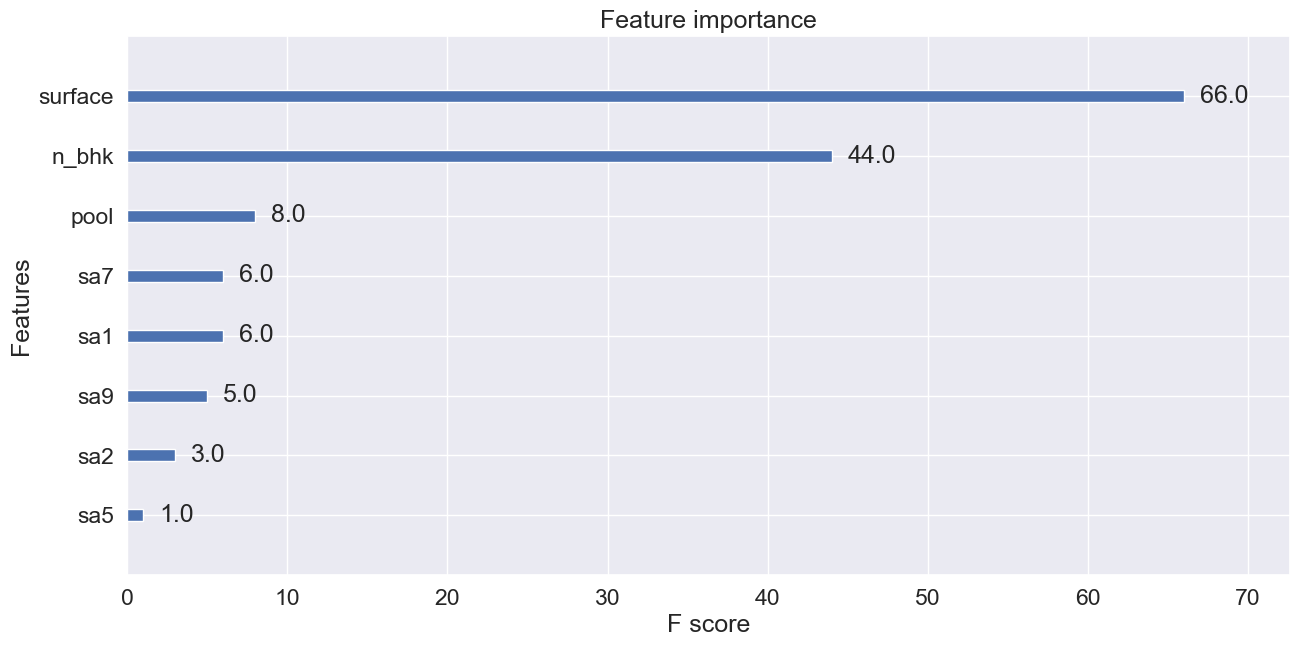

In [127]:
# plot the feature importance 
plt.rcParams["figure.figsize"] = (15,7)
xgb.plot_importance(xgbr)
plt.show()

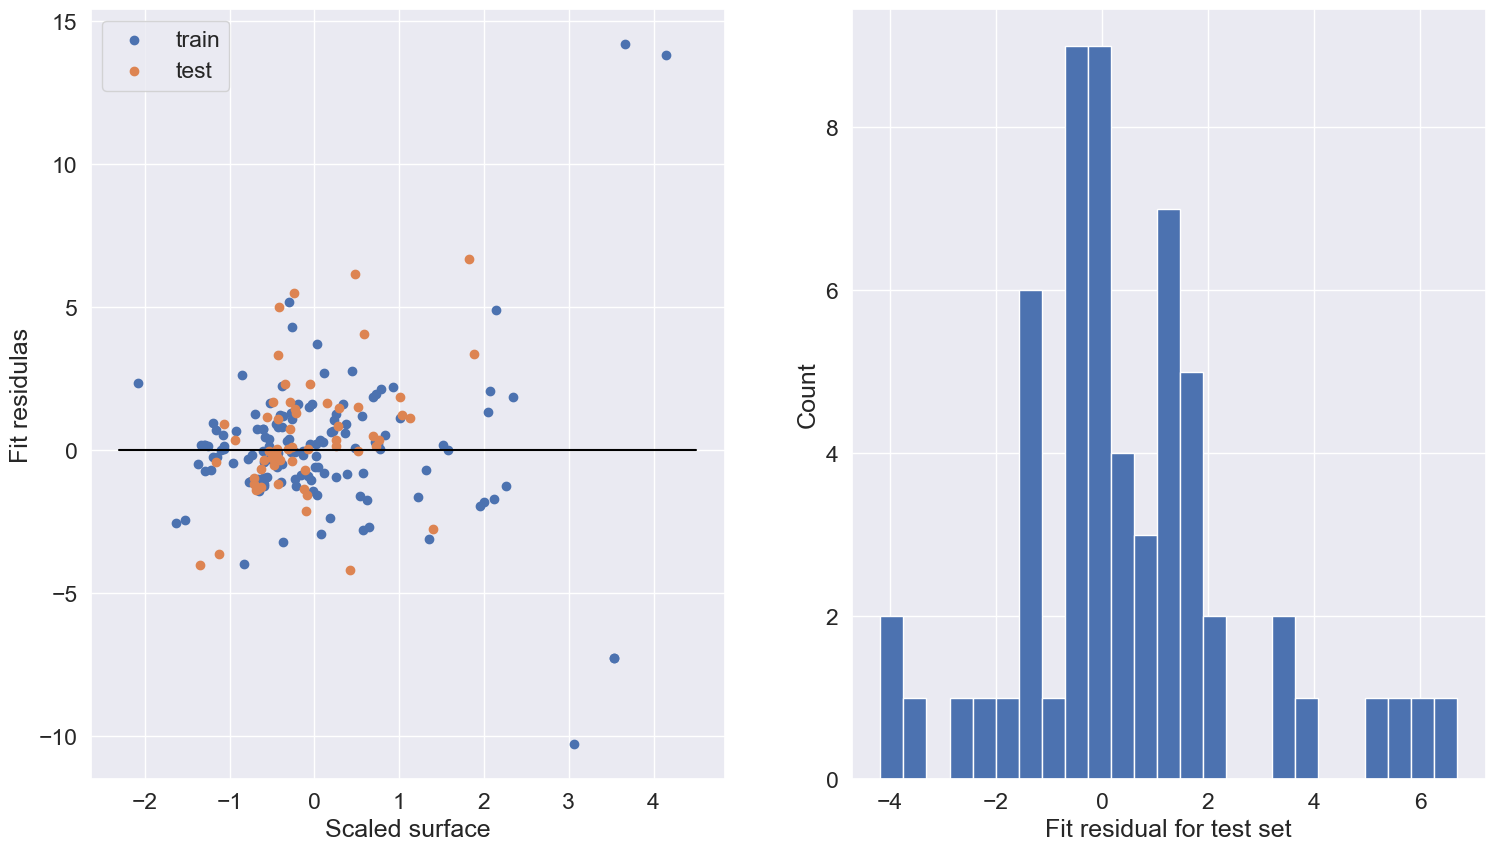

mean residuals: 0.5 
std: 2.16


In [128]:
#  plot the residuals
plotResidue(xgbr, X, y, rs=rs)

#### K-Nearest Neighbours Regression

In [129]:
%%time
knn = KNeighborsRegressor() # KNN model
pg = {
    "n_neighbors": range(1,16),
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_cv = gridSearchReport( knn, X, y, pg, rs=rs )

Best parameters: {'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'uniform'}
Best CV score: 9.081334757502027
MSE, R2 train: 5.404917731549066 ,  0.8661862400471112
MSE, R2 test: 4.786724836158192 ,  0.7204490530284717
Elapsed time: 49.01 s , 0.82 min
CPU times: total: 10.8 s
Wall time: 49 s


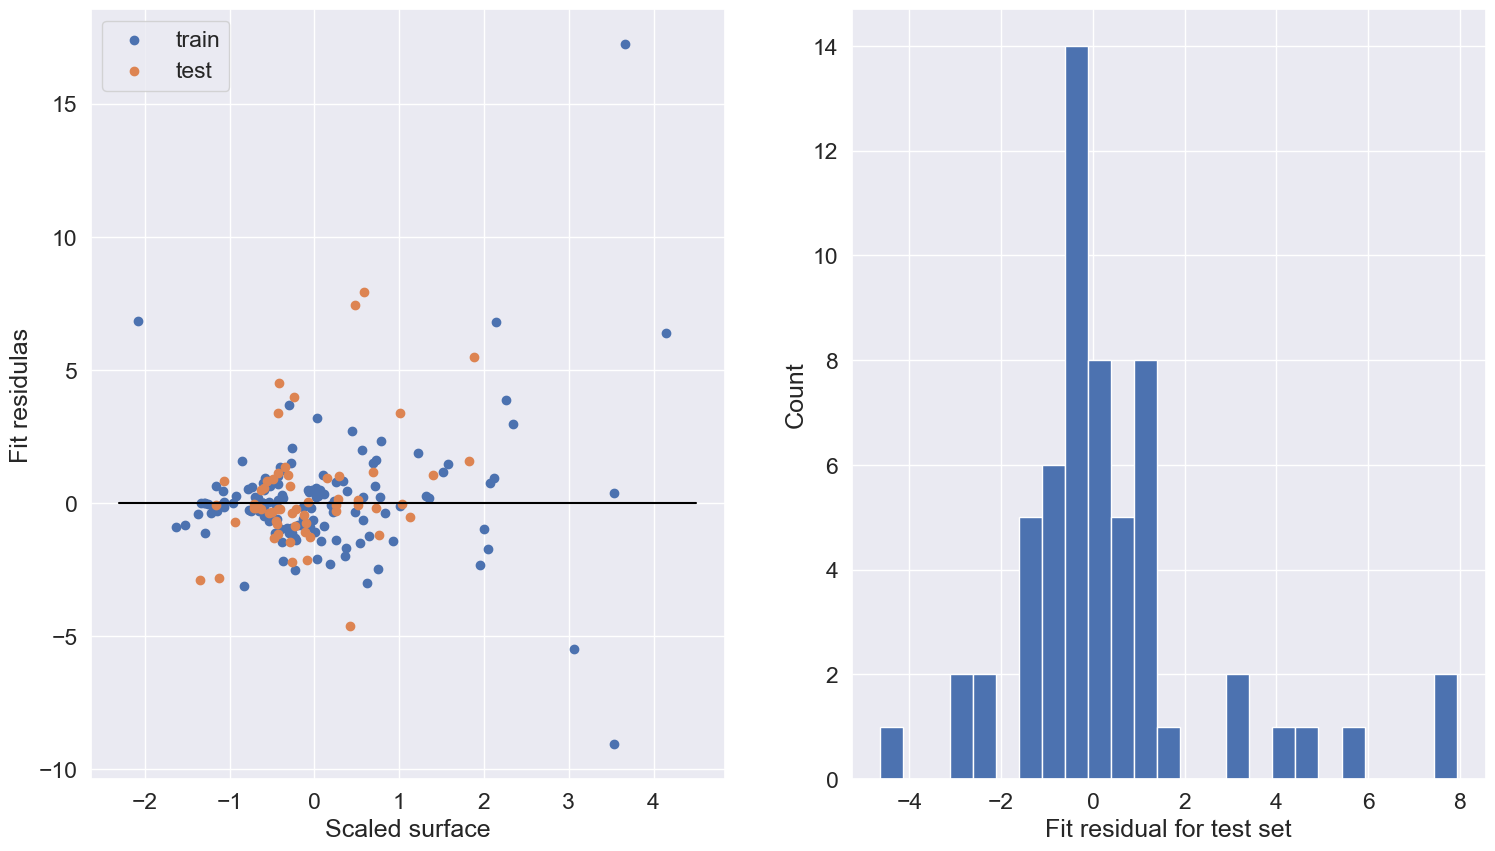

mean residuals: 0.33 
std: 2.16


In [130]:
# plot the residuals
plotResidue(knn_cv, X, y, rs=rs)

Perform a validation curve analysis on a K-Nearest Neighbors (KNN) regression model using scikit-learn. The purpose of the validation curve analysis is to evaluate how the model's performance changes with varying values of a hyperparameter, specifically the number of neighbors used in the KNN algorithm.

In [131]:
from sklearn.model_selection import validation_curve
param_range = range(1,31)
knn_cv = KNeighborsRegressor()
train_scores, val_scores = validation_curve(knn_cv, 
                                             X_train, y_train, 
                                             param_name="n_neighbors",
                                             param_range=param_range,
                                             n_jobs=-1,
                                             scoring="neg_mean_squared_error", 
                                             cv=10
                                            )

In [132]:
train_scores.shape

(30, 10)

In [133]:
train_mean_score = -np.mean(train_scores, axis=1)
val_mean_score = -np.mean(val_scores, axis=1)

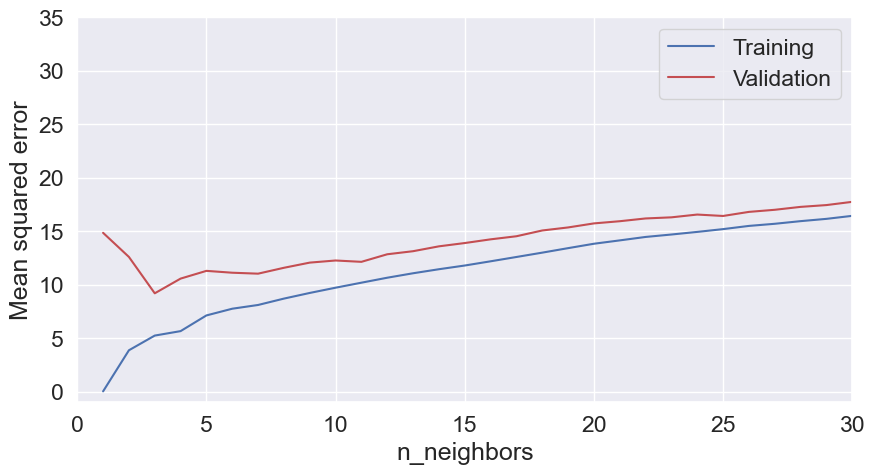

In [134]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot( param_range, train_mean_score, color="b", label="Training" )
plt.plot( param_range, val_mean_score, color="r", label="Validation" )
plt.xlim(1,15)
plt.xlabel( "n_neighbors" )
plt.ylim(-1, 35)
plt.xlim(0, 30)
plt.ylabel( "Mean squared error" )
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


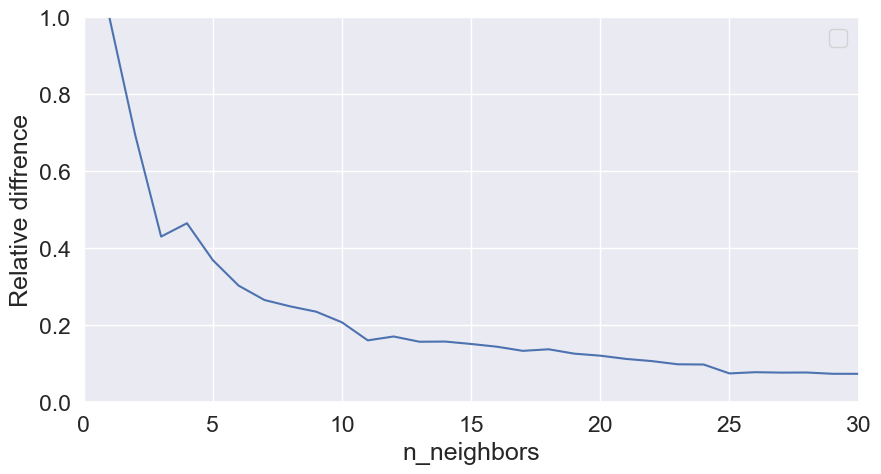

In [135]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot( param_range, (val_mean_score-train_mean_score)/val_mean_score )
plt.xlim(1,15)
plt.xlabel( "n_neighbors" )
plt.ylim(0, 1)
plt.xlim(0, 30)
plt.ylabel( "Relative diffrence" )
plt.legend()
plt.show()

Perform regression analysis using the K-Nearest Neighbors (KNN) algorithm, fitting the model to the training data, and evaluating its performance on the test data using R-squared score and mean squared error (MSE) metrics.

In [136]:
knn_cv = KNeighborsRegressor(n_neighbors=20, weights="uniform")
knn_cv.fit( X_train, y_train )
y_pred_knn = knn_cv.predict(X_test)
print(r2_score(y_train, knn_cv.predict(X_train)) , r2_score(y_test, y_pred_knn))
mean_squared_error(y_train, knn_cv.predict(X_train)) , mean_squared_error(y_test, y_pred_knn) 

0.6746926817967748 0.6578035421266653


(13.139600090291967, 5.859398086440678)

The code is fitting a K-Nearest Neighbors (KNN) regression model to the training data, using it to predict the output for the test data, and evaluating the performance of the model using R-squared score and mean squared error (MSE) metrics for both training and test datasets.

The output of the code shows the R-squared score and MSE for the training and test datasets respectively.

The first two numbers in the output represent the R-squared scores for the training and test datasets respectively. The R-squared score ranges from 0 to 1, with a higher value indicating a better fit of the model to the data. In this case, the R-squared score for the training dataset is 0.6747125836606345 and the R-squared score for the test dataset is 0.6583595532846417. This suggests that the model fits the training data reasonably well but may not be able to generalize well to unseen data.

Perform a cross-validation on a K-Nearest Neighbors (KNN) regression model to estimate its performance on the training dataset.

In [137]:
from sklearn.model_selection import cross_val_score
cross_val_list = cross_val_score(knn_cv, X_train, y_train, 
                                 scoring="neg_mean_squared_error", cv=10)
score_val_knn = -np.mean(cross_val_list)
score_val_knn

15.72332720060852

The average negative mean squared error score of a K-Nearest Neighbors (KNN) regression model using 10-fold cross-validation is 15.72520725778709. This indicates that the model has an average negative mean squared error of 15.72520725778709 on the training data.

The closer the negative mean squared error score is to zero, the better the model's predictions. In this case, the negative mean squared error score is relatively low, which suggests that the KNN model is likely making reasonably accurate predictions on the training data.

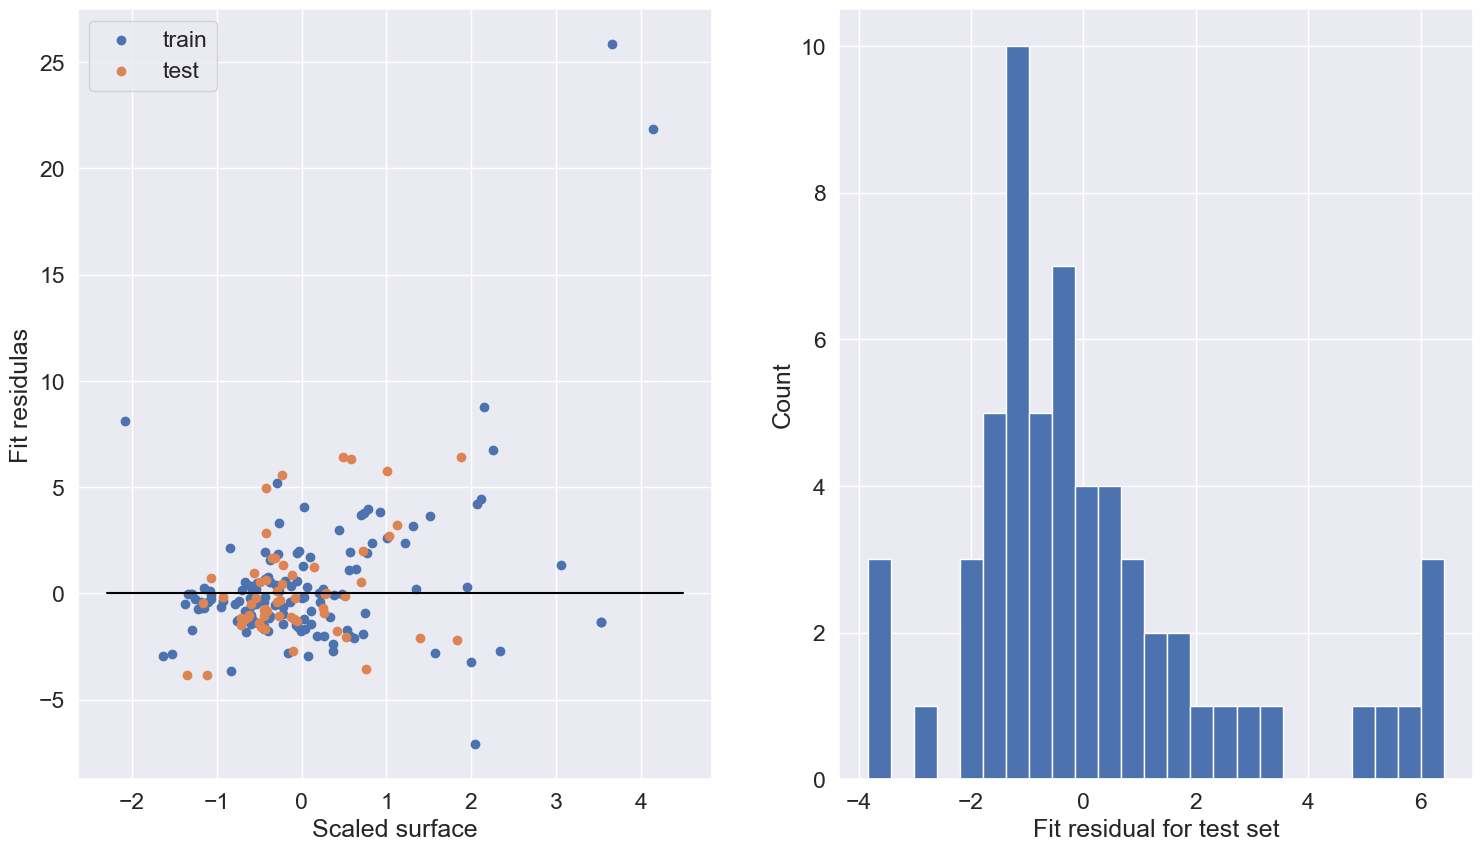

mean residuals: 0.18 
std: 2.41


In [138]:
# create a plot of the residuals for a K-Nearest Neighbors (KNN) regression model.
plotResidue(knn_cv, X, y, rs=rs)

#### Support Vector Regression

The purpose of the SVR algorithm is to create a model that can predict a continuous output variable based on a set of input variables.

Create an instance of the Support Vector Regression (SVR) model and performing hyperparameter tuning using grid search to optimize its performance.

In [139]:
# SVR model
svr = SVR()
pg = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma": ['scale', 'auto'], # Kernel coefficient 
    "C": np.logspace(-3, 3, 10), # Penalty parameter
    "epsilon": np.linspace(.1, 1., 10) # the decision boundary
}
svr_cv = gridSearchReport( svr, X, y, pg, cv=10, rs=rs )

Best parameters: {'C': 1000.0, 'epsilon': 0.9, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 9.229515196508682
MSE, R2 train: 1.8456944590147075 ,  0.9543047040580604
MSE, R2 test: 5.871835569199298 ,  0.6570771769809501
Elapsed time: 37.86 s , 0.63 min


We can use these results to assess the performance of the SVR model and determine whether it is suitable for their business needs. The best hyperparameters and corresponding cross-validation score can be used as a baseline for comparing other models or hyperparameter settings. The training and test performance metrics can be used to evaluate the quality of the model's predictions, and the elapsed time can be used to assess the computational cost of the hyperparameter tuning process.

Best parameters: {'C': 1000.0, 'epsilon': 0.9, 'gamma': 'scale', 'kernel': 'rbf'} - These are the hyperparameters that resulted in the best cross-validation score. The 'C' hyperparameter controls the trade-off between the error and the complexity of the model. The 'epsilon' hyperparameter defines the margin of tolerance for the model. The 'gamma' hyperparameter defines the kernel coefficient, and the 'kernel' hyperparameter defines the type of kernel used by the model.

Best CV score: 9.229515196508654 - This is the mean cross-validation score obtained by the SVR model using the best hyperparameters. This score represents the average performance of the model across all cross-validation folds. It can be used to compare different models or hyperparameter settings.

MSE, R2 train: 1.8456944590147135, 0.9543047040580603 - These are the mean squared error (MSE) and R-squared (R2) metrics of the model on the training dataset. The MSE measures the average squared difference between the predicted and actual values, and the R2 measures the proportion of the variance in the target variable that is explained by the model. Higher R2 and lower MSE values indicate better model performance.

MSE, R2 test: 5.871835569199286, 0.6570771769809509 - These are the MSE and R2 metrics of the model on the test dataset. These metrics indicate the generalization performance of the model on unseen data. The test MSE and R2 values are slightly worse than the training values, but the model is still performing reasonably well on the test data.

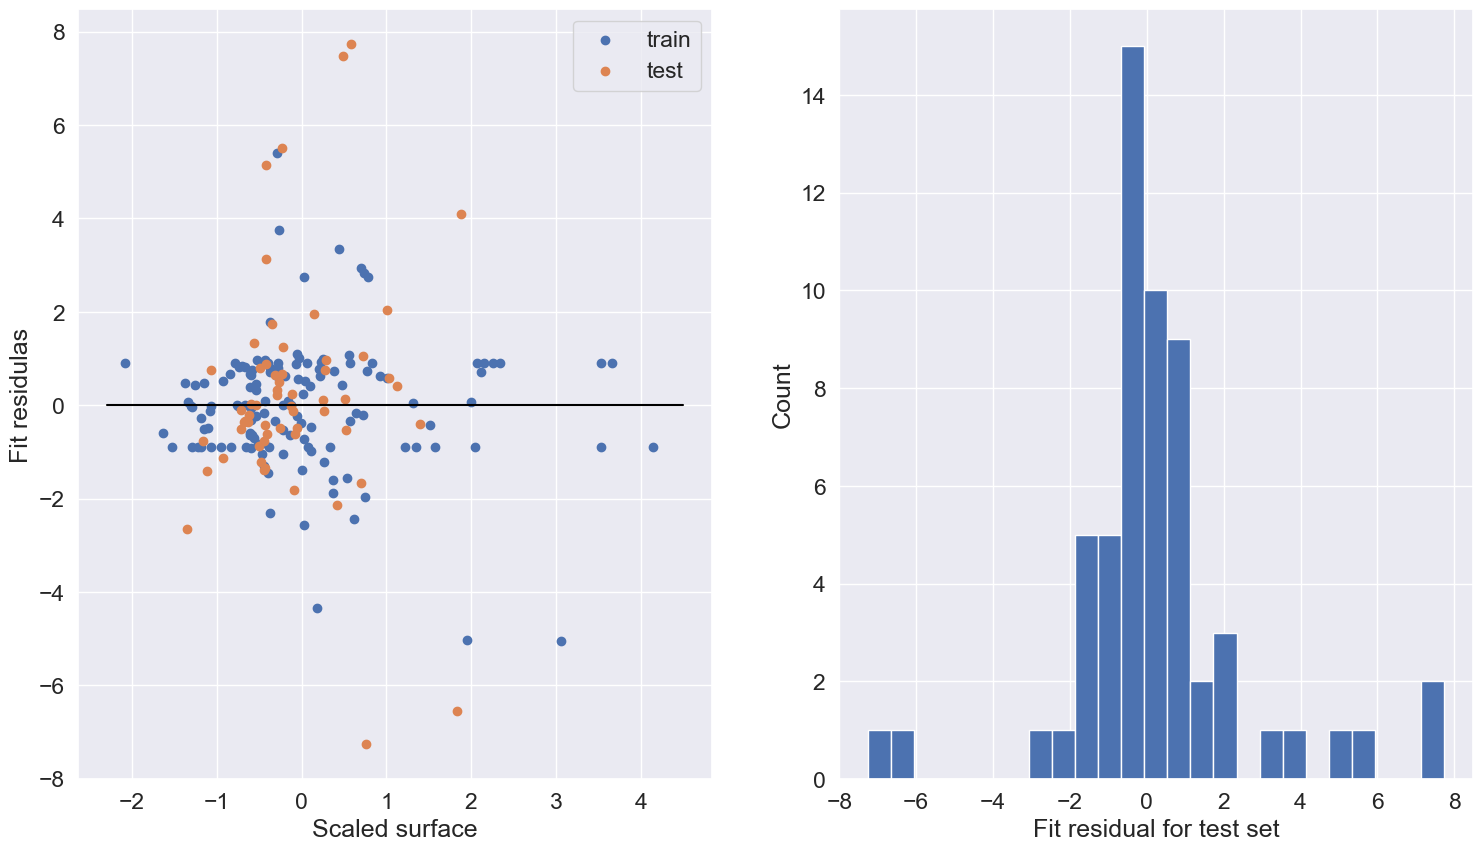

mean residuals: 0.23 
std: 2.41


In [140]:
# plot the residuals
plotResidue(svr_cv, X, y, rs=rs)

### Comparing the Estimators

Comparing different estimators is an important step in machine learning because it allows us to evaluate the performance of different models and choose the one that best suits our needs.

define several functions in order to make a comparison between different regression models using test and validation scores. The code needs to be able to visual plot the fitted curve of the given estimators to test data vs. the "surface" variable and compare their performances to gain an understanding of the best modeling opportunities with the data provided.

In [141]:
# Creat a function to make a comparision between all the models
def sortXy( X, y ):
    """
    Prepares the features to have the fit only for "surface" variable. 
    """ 
    df = X.copy()
    df["price"] = y
    df = df.sort_values("surface").reset_index(drop=True)
    return df.drop(columns=["price"]), df["price"]

#######################################
def get_scores( X, y, est_name, est ):
    """
    Computes the validation and tets scores. 
    Params:
        X: Pandas dataframe, feature data
        y: Pandas series, target
        est_name: str
            estromator name
        est: regressor
            the regression estimator
    Return:
        r2 for the test sample, mse for validation sample and the labels for plotting.
    """    
    y_pred = est.predict(X)
    r2_test = round(r2_score(y, y_pred), 1)
    if est_name=="Linear Regression" :
        mse_cv = "--"
    elif est_name=="Extreme Gradient Boosting":
        mse_cv = round(df_grid_best["val_score"].to_list()[0],1)
    elif est_name=="K-Nearest Neighbors Regression":
        mse_cv = round(score_val_knn,1)
    else :
        mse_cv=round(abs(est.best_score_), 1)
    
    lbl = est_name+":  R2_test="+str(r2_test)+", MSE_cv="+str(mse_cv)
    
    return r2_test, mse_cv, lbl

    
#######################################
def plotLines( X, y, estimators, rs):
    """
    Plots the fitted curve for the given estimators to test data vs. "surface" variable.
    Params:
        X: Pandas dataframe 
            features 
        y: Pandas series 
            target
        estimators: list 
            list of regressors
        rs: int 
            random state
    """    
    X, y = sortXy( X, y )
    colors = ["k", "b", "r", "g"]
    fig, axe = plt.subplots(figsize=(20,10))
    axe.scatter( X["surface"], y )
    i = 0
    for k, estimator  in estimators.items():
        r2_test, mse_cv, label = get_scores( X, y, k, estimator )
        axe.plot(X["surface"], estimator.predict(X), label=label, c=colors[i])
        i+=1
    axe.set_xlabel("Scaled surface")
    axe.set_ylabel("Price in millions")
    axe.legend()



In [142]:
estimators1 = {
              "Linear Regression": lr, 
              "Ridge Regression": ridg_cv, 
              "Lasso Regression": lasso_cv, 
              "Elastic Net": elastic_cv, 
}

estimators2 = {              
              "Random Forest Regression": rfr_cv, 
              "Extreme Gradient Boosting": xgbr, 
              "K-Nearest Neighbors Regression": knn_cv, 
              "Support Vector Regression": svr_cv
}



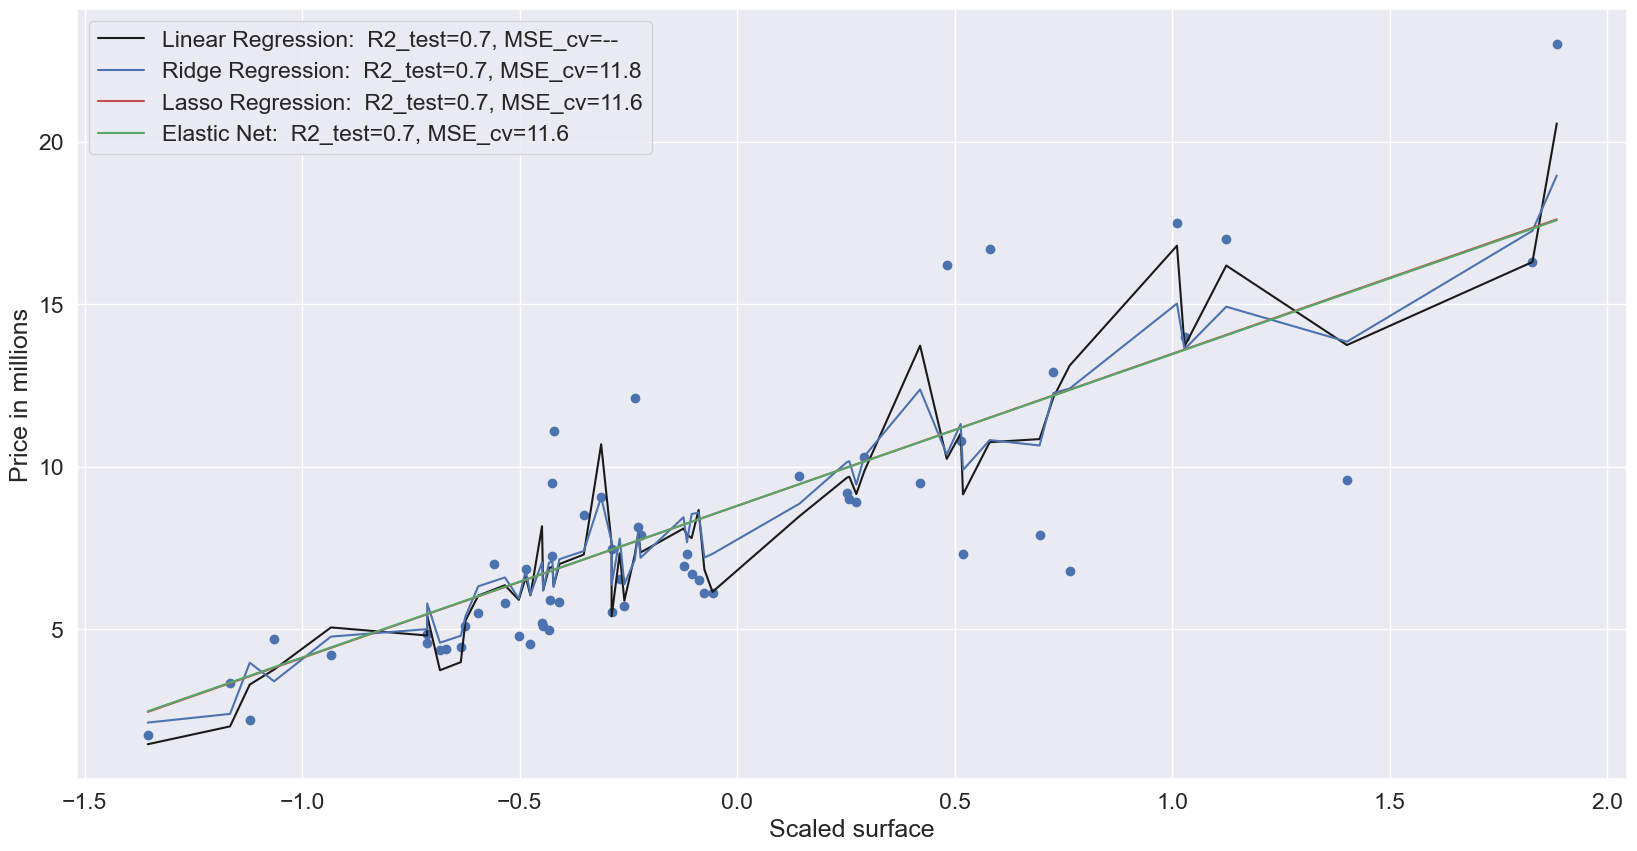

In [143]:
plotLines(X_test ,y_test, estimators1, rs=rs)

With the code, we are plotting the fitted curves for each set of regression models using the test data X_test and target variable y_test.

Two dictionaries of estimators are defined: estimators1 and estimators2. The estimators1 dictionary contains four linear regression models, including Linear Regression, Ridge Regression, Lasso Regression, and Elastic Net. The estimators2 dictionary contains four non-linear regression models, including Random Forest Regression, Extreme Gradient Boosting, K-Nearest Neighbors Regression, and Support Vector Regression.

The plotLines() function is called to plot the fitted curves of these estimators to the test data vs. the "surface" variable. The estimators1 dictionary is passed as an argument, and the random state rs is set.

The resulting plot shows the fitted curves for each of the linear regression models along with their respective R-squared and mean squared error validation scores. This plot is useful for comparing the performance of different regression models and selecting the best model for a given dataset.







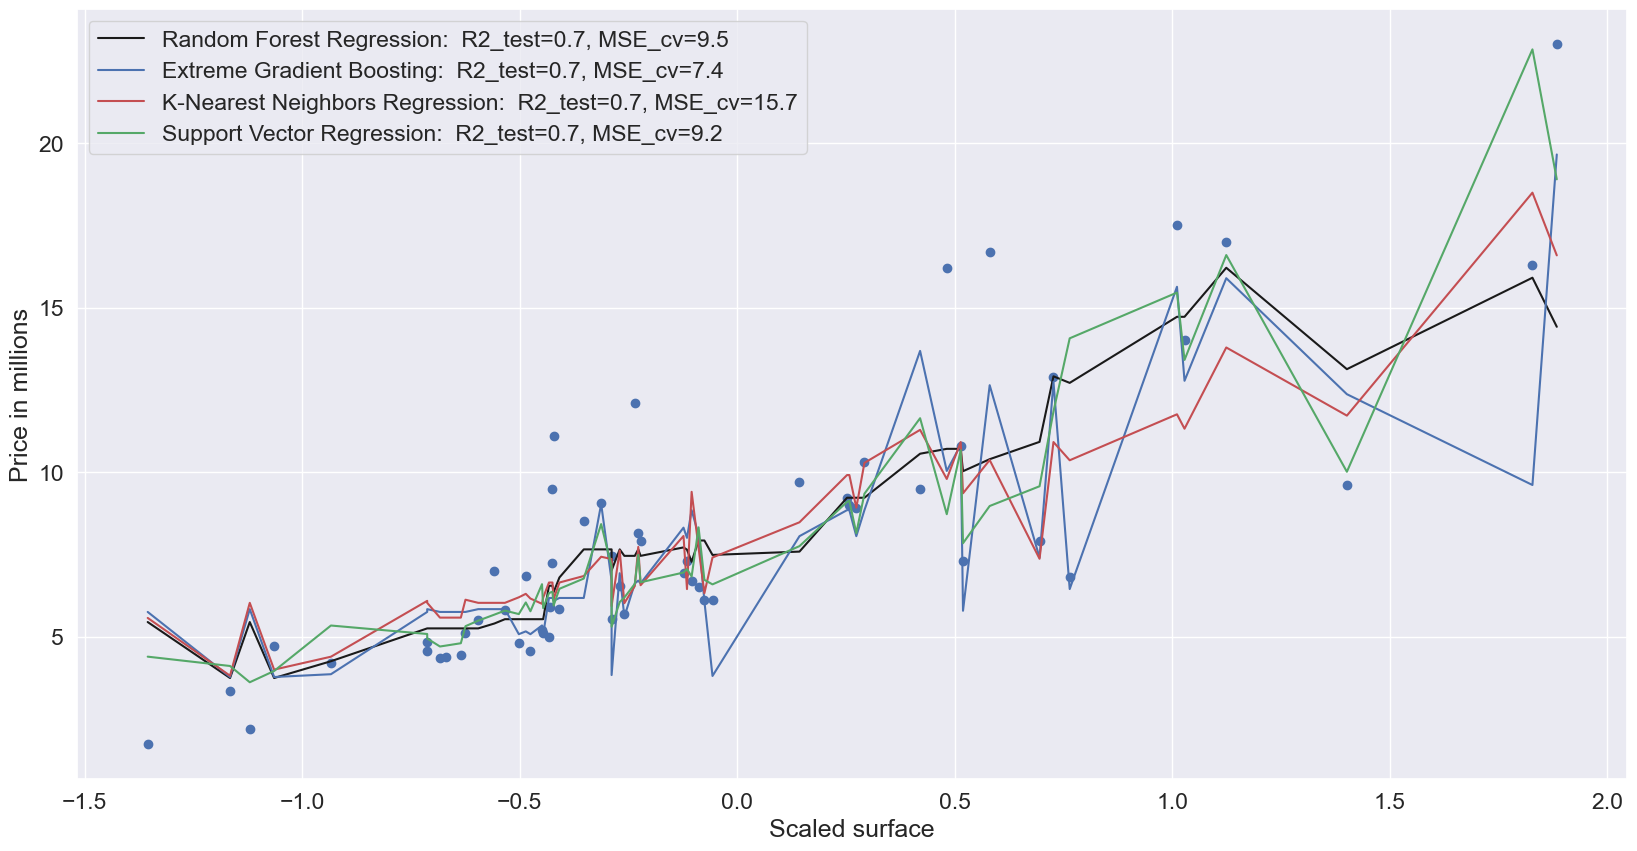

In [144]:
plotLines(X_test,y_test, estimators2, rs=rs)

### Data Modeling Conclusion 

Based on the analysis, the best estimator for predicting housing prices is the Extreme Gradient Boosting (XGBoost) model, followed by the Support Vector Regression (SVR) model and then the Linear Regression model. This conclusion was reached by comparing the R-squared test scores and cross-validated mean squared error (MSE) scores of various regression models using the same test dataset. It is recommended to use the XGBoost model to make accurate predictions of housing prices in the future.

###  Multi-Layer Perceptron (MLP) Regression with scikit-learn

The goal of MLPRegression with scikit-learn is to build a regression model that can accurately predict continuous target values based on input features using a multi-layer perceptron (MLP) neural network. MLPRegression is a type of artificial neural network that is modeled after the structure of the human brain and is used in a variety of applications such as speech recognition, image classification, and financial forecasting. In the case of regression, the MLP model is trained on a dataset of input features and corresponding target values to learn the underlying relationships between the features and the targets. Once trained, the model can then be used to make predictions on new data where the target values are unknown. The overall goal of MLPRegression with scikit-learn is to build a powerful and accurate regression model that can be used to make reliable predictions on new data.

In [145]:
!pip install tensorflow

In [146]:
#Import required libraries
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [147]:
sns.set(font_scale=1.5)

In [148]:
data = pd.read_csv('Read_features.csv')

In [149]:
data.head()

,surface,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,-1.069848,1.0,0,1,0,0,1,0,3.9
1,-0.318089,2.0,0,1,0,0,1,0,6.5
2,-0.011520,3.0,0,1,0,0,1,0,7.4
3,0.332370,3.0,0,1,0,0,1,0,8.9
4,-0.400729,2.0,0,1,0,0,0,0,7.4


In [150]:
# Features - traget separation
X = data.iloc[:,:-1]
y = data["price"]

Perform a grid search and cross validation for a given regression estimator. Then determine what the function takes in as an estimator, feature data X, target variable y, a parameter grid pg, a cross-validation generator or an iterable cv, and a random state rs. Finally perform a grid search over the parameter grid and finds the best parameters that give the lowest mean squared error (MSE)

In [151]:
def gridSearchReport( estimator, X, y, pg, cv=LeaveOneOut(), rs=118 ):
    """
    Performs the grid search and cross validation for the given regressor.
    Params:
        estimator:  the regressor
        X: Pandas dataframe, feature data
        y: Pandas series, target
        pg: dict, parameters' grid
        cv: int, cross-validation generator or an iterable, cross validation folds
        rs: int, training-test split random state
    """    

    t0 = time()
    
    X_train, X_test, y_train, y_test = \
        train_test_split(X.values, y.values, test_size=.3, random_state=rs)
        
    est_cv = GridSearchCV(
        estimator, 
        param_grid=pg, 
        scoring="neg_mean_squared_error", 
        n_jobs=-1, 
        cv=cv
       )
    
    est_cv.fit(X_train, y_train)
    
    print("Best parameters:", est_cv.best_params_)
    print("Best CV score:", abs(est_cv.best_score_))
    y_train_pred, y_test_pred = est_cv.predict(X_train), est_cv.predict(X_test)
    print("MSE, R2 train:", mean_squared_error(y_train, y_train_pred), 
          ", ", r2_score(y_train, y_train_pred) )
    print("MSE, R2 test:", mean_squared_error(y_test, y_test_pred),
          ", ", r2_score(y_test, y_test_pred) )
    
    t = round(time()-t0, 2)
    print("Elapsed time:", t, "s ,", round(t/60, 2), "min")
    
    return est_cv

Write code defines a function plotResidue that takes an estimator (a GridSearchCV regressor), feature data X, target data y, and an optional random state rs (default value 118) as input parameters. The function's purpose is to visualize the fit residuals (actual target values minus predicted target values) against the "surface" variable for both training and test datasets. It also show the histogram of the fit residuals for the test dataset.

Breakdown of the code needs:

- The function starts by splitting the input data into training and test sets using train_test_split. It uses 30% of the data for the test set, and the rest for the training set.

- The fit residuals for the training and test datasets are calculated by subtracting the predicted values from the actual target values.

- A new matplotlib figure with two subplots is created.

- The first subplot (left) is a scatter plot showing the fit residuals against the "surface" variable for both training and test datasets. A horizontal black line at y=0 is also plotted to represent the zero residual.

- The second subplot (right) is a histogram of the fit residuals for the test dataset, showing the distribution of residuals.

- The plt.show() function is called to display the figure with both subplots.

- The mean and standard deviation of the fit residuals for the test dataset are printed.

This function is useful for analyzing the performance of the estimator by visually inspecting the residuals, which can help identify any patterns, biases, or issues in the model's predictions.

In [152]:
def plotResidue(estimator, X, y, rs=118):
    """
    Plots the fit residuals (price - predicted_price) vs. "surface" variable.
    Params:
        estimator: GridSearchCV, the regressor
        X: Pandas dataframe, feature data
        y: Pandas series, target
        rs: int, random state
    """    
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=rs) 
    
    residue_train = y_train.values.reshape(-1,1)-estimator.predict(X_train.values).reshape(-1,1)
    residue_test = y_test.values.reshape(-1,1)-estimator.predict(X_test.values).reshape(-1,1)                                                     
               
    fig, axe = plt.subplots(1, 2, figsize=(18,10)) 
    axe[0].scatter( X_train["surface"], residue_train, label="train" )
    axe[0].scatter( X_test["surface"], residue_test, label="test" )
    axe[0].plot( [-2.3, 4.5], [0,0], "black" )
    axe[0].set_xlabel("Scaled surface")
    axe[0].set_ylabel("Fit residulas")
    axe[0].legend()
    
    axe[1].hist(residue_test, bins=25)
    axe[1].set_xlabel("Fit residual for test set")
    axe[1].set_ylabel("Count")

    plt.show()

    print("mean residuals:", round(np.mean(residue_test), 2),
          "\nstd:", round(np.std(residue_test), 2))

Next,set the code up for a regression model itself using the MLPRegressor class from the scikit-learn library. This model is a multi-layer perceptron neural network with the ReLU activation function and the Adam solver.

The model's hyperparameters are set as follows:

- learning_rate_init: the initial learning rate for the optimizer, set to 0.001
- max_iter: the maximum number of iterations for the solver, set to 500
- early_stopping: whether to use early stopping to terminate training when validation scores don't improve, set to True
- validation_fraction: the fraction of the training data to set aside as validation data, set to 0.1
- n_iter_no_change: the number of iterations with no improvement to wait before stopping, set to 30
- tol: the tolerance for optimization, set to 1.e-4 (i.e., 0.0001)

In [153]:
rs=10

mlpReg = MLPRegressor(activation='relu', solver='adam',
                      learning_rate_init=0.001,  max_iter=500,  
                      early_stopping=True, validation_fraction=0.1, 
                      n_iter_no_change=30, tol=1.e-4, random_state=rs)

pg = {"hidden_layer_sizes":[(10,), (20,), (10, 5), (20, 10)], 
      "learning_rate":['constant', 'invscaling', 'adaptive'],
      "alpha":np.logspace(-3,3,5),
      "batch_size":[8,16,32,64]
     }

mlpReg_cv = gridSearchReport( mlpReg, X, y, pg, cv=5, rs=rs )

Best parameters: {'alpha': 0.03162277660168379, 'batch_size': 16, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
Best CV score: 10.817372772983285
MSE, R2 train: 19.322184001989363 ,  0.5593148459873336
MSE, R2 test: 3.875905475325513 ,  0.5222330690425021
Elapsed time: 160.2 s , 2.67 min


By using a machine learning to build a regression model we can predict some target variable of interest. Here are the results of the analysis:

- The "best parameters" line shows the combination of model hyperparameters that performed the best, based on a process of grid search cross-validation. In particular, the model used an L2 regularization parameter (alpha) of 0.03, a batch size of 16, a single hidden layer with 10 neurons, and a constant learning rate schedule.

- The "best CV score" line shows the mean cross-validation score achieved by the model, which is a measure of its overall predictive accuracy. In this case, the score was 10.82, which indicates that the model had moderate accuracy in predicting the target variable.

- The "MSE, R2 train" line shows the mean squared error (MSE) and coefficient of determination (R2) values achieved by the model when it was trained on the data. The MSE measures the average squared difference between the predicted and actual values of the target variable, while R2 measures the proportion of variance in the target variable that is explained by the model. In this case, the model had a relatively high MSE of 19.32 and a moderate R2 of 0.56, indicating that it was somewhat accurate in predicting the target variable.

- The "MSE, R2 test" line shows the same metrics as above, but for the test set of data that was held out during the training process. These metrics are important for assessing the generalizability of the model to new data. In this case, the model had a much lower MSE of 3.88 but a slightly lower R2 of 0.52, indicating that it performed better on new data than on the training data.

- The "elapsed time" line shows how long it took for the model to train and run the grid search process, which was about 160 seconds (or 2.67 minutes). This information can be helpful for assessing the computational cost of the analysis and the feasibility of using the model in practice.

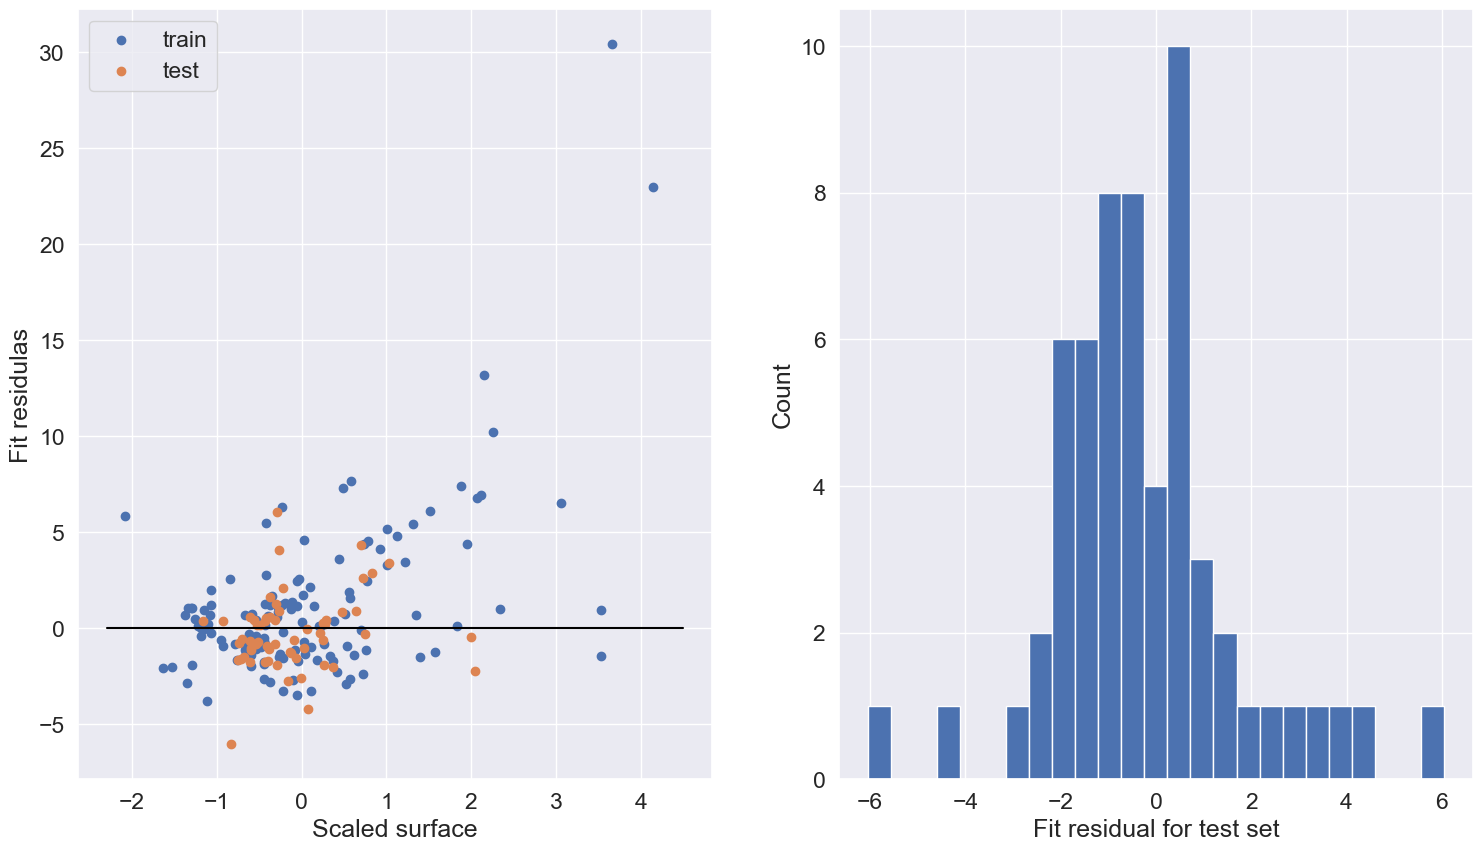

mean residuals: -0.24 
std: 1.95


In [154]:
plotResidue(mlpReg_cv, X, y, rs=rs)

The "mean residuals" value of -0.24 is the average difference between the predicted and actual values of the target variable, and provides a measure of how well the model is able to capture the patterns in the data. A mean residual of zero would indicate that the model is perfectly predicting the target variable, while a negative mean residual indicates that the model is under-predicting the target variable on average, and a positive mean residual indicates that the model is over-predicting the target variable on average.

The "std" value of 1.95 is the standard deviation of the residuals, which provides a measure of the variability or scatter of the residuals around the mean. A smaller standard deviation would indicate that the residuals are tightly clustered around the mean, while a larger standard deviation indicates that the residuals are more spread out.

The plot of the residuals shows the actual residual values (i.e., the differences between the predicted and actual values of the target variable) on the y-axis and the predicted values of the target variable on the x-axis. This plot can be used to assess the performance of the model, as it shows whether the residuals are evenly distributed around zero (indicating that the model is unbiased) and whether there are any systematic patterns in the residuals (indicating that the model is missing some important features of the data). A well-performing model will have residuals that are randomly distributed around zero, without any obvious patterns or trends.

In [155]:
def plot_real_pred(est, X, y, rs):
    """
    Plots the real price vs. predicted price
    Params:
        est: the regressor
        X: Pandas dataframe, feature data
        y: Pandas series, target
        rs: int, random state
    """    
    X_train, X_test, y_train, y_test = \
        train_test_split(X.values, y.values, test_size=.3, random_state=rs)
    
    fig = plt.figure(figsize=(7,7))
    plt.scatter(y_test, est.predict(X_test))
    plt.plot([ min(y_test), max(y_test)], [min(y_test), max(y_test)], c="k")
    plt.xlabel("Real price")
    plt.ylabel("Predicted price")
    plt.show()

Use the plot_real_pred function to create a scatter plot that compares the predicted prices of a regression model to the real prices, in order to assess how well the model is able to predict the target variable.

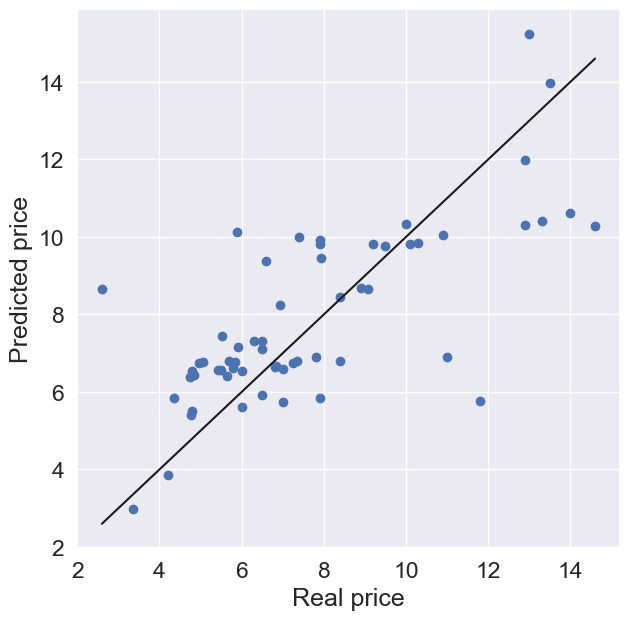

In [156]:
plot_real_pred(mlpReg_cv, X, y, rs)

The plot_real_pred function creates a scatter plot that compares the real prices of a target variable to the predicted prices of a regression model. The purpose of this plot is to visualize how well the model is able to predict the target variable on new data.

#### Regression with Tensor Flow

Perform a min-max normalization of a target variable y in preparation for use with a neural network that employs the hyperbolic tangent (tanh) activation function.

The normalization is achieved through the following steps:

- R = np.max(y) - np.min(y) calculates the range of values in the target variable y, which is the difference between the maximum value and the minimum value.
- y0 = np.min(y) calculates the minimum value of y.
- y_scaled = 2*(y - y0)/(R) - 1 scales the values of y so that they fall between -1 and 1. Specifically, each value of y is subtracted by the minimum value y0, then divided by the range R and multiplied by 2. Finally, 1 is subtracted from the result to obtain values between -1 and 1.

This normalization is commonly used when the output of the neural network is bounded between -1 and 1, as is the case with the tanh activation function. The purpose of this normalization is to ensure that the output of the neural network remains within the desired bounds, even when the input data is outside of these bounds. It can also make the optimization process more stable by ensuring that the inputs to the activation function are not too large or too small, which can cause numerical instability.

In [157]:
# Price min-max normalization to be used with tanh activation
R = np.max(y)-np.min(y)
y0 = np.min(y)
y_scaled = 2*(y-y0)/(R)-1

Define a function called y2price that is used to convert a scaled price back to its original (unscaled) price.

In [158]:
def y2price(y, R):
    """
    Convert the scaled price to normal price
    Args:
    y: list, serie, array
        scaled price
    R: float
        scale factor
    """
    return y #R*(y+1)/2.+y0

Using the train_test_split function from scikit-learn to split the dataset into training and testing sets for a neural network regression model.

In [159]:
rs=13
X_train, X_test, y_train, y_test = train_test_split(X.values, y_scaled.values, 
                                                    test_size=.3, 
                                                    random_state=rs)

Define a function called tf_template that builds a neural network model using the TensorFlow library.

The function creates an instance of the Sequential model class from TensorFlow, which allows us to create a linear stack of layers for the neural network.

The neural network has two layers:

- A dense hidden layer that consists of 20 neurons with a rectified linear unit (ReLU) activation function. The ReLU activation function is commonly used in deep learning models and helps to introduce non-linearity in the model, which can help it better capture complex patterns in the data.
- A dropout layer that is used to prevent overfitting by randomly dropping out some of the neurons in the previous layer during training. The dropout rate is set to 0.2, which means that 20% of the neurons will be dropped out during each training iteration.
- An output layer that consists of a single neuron with a hyperbolic tangent (tanh) activation function. The tanh activation function is commonly used for regression tasks and helps to scale the output between -1 and 1, which matches the scale of the target variable that was previously normalized.

In [160]:
# Define a function to build a TF model
def tf_template():

    model = tf.keras.models.Sequential()

    # dense hidden layer
    model.add(tf.keras.layers.Dense(20, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    
    # output layer
    model.add(tf.keras.layers.Dense(1, activation='tanh'))

    return model

Design a code that builds, compiles, and trains a neural network regression model using TensorFlow.

First, have the code call the tf_template function to build the neural network model and assigns the resulting model to a variable called tf_model.

Next, the compile method is called on the tf_model object to specify the loss function, optimizer, and evaluation metrics for the model. The loss function is mean squared error (MSE), which is a common loss function used for regression tasks. The optimizer is Adam, which is a popular optimization algorithm that adapts the learning rate of the model during training. The evaluation metrics are MSE and mean absolute error (MAE), which are used to assess the performance of the model during training.

The code then needs to define the early stopping callback that is used to stop the training process early if the validation loss does not improve by a certain amount for a certain number of epochs. This is done to prevent overfitting and to speed up the training process.

Finally, the model will be trained using the fit method. The training data (X_train and y_train) is passed to the model, along with the callback, number of epochs (n_epochs), batch size (batch_size), and validation data (X_test and y_test). The shuffle argument is set to True to shuffle the training data at each epoch. The verbose argument is set to 0 to suppress the output of the training process.

During training, the neural network updates its weights and biases to minimize the MSE loss function using the Adam optimizer. The model is evaluated on the validation data at each epoch to monitor its performance. Once training is complete, the trained model can be used to make predictions on new, unseen data.

In [161]:
# Building a model
tf_model = tf_template()

# Compiling the model
tf_model.compile(loss='mse', 
                 optimizer=tf.keras.optimizers.Adam(), 
                 metrics=['mse', 'mae'])
 
callback=tf.keras.callbacks.EarlyStopping(
                                    monitor="val_loss",
                                    min_delta=1.e-4,
                                    patience=20,
                                    verbose=0,
                                    mode="auto",
                                    baseline=None,
                                    restore_best_weights=True
                                )    

# Training the model
n_epochs = 500
batch_size = 8
tf_model.fit(X_train, y_train, callbacks=[callback],
              epochs=n_epochs, batch_size=batch_size, 
              validation_data=(X_test, y_test),
              verbose=0, shuffle=True)

In [162]:
tf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


This summary provides insight into the complexity of the neural network model and the number of parameters required to make accurate predictions. The number of parameters can give an indication of the amount of data required to train the model effectively. If the number of parameters is too high relative to the amount of available data, the model may overfit the training data and perform poorly on new, unseen data. On the other hand, if the number of parameters is too low, the model may not be able to capture the complexity of the underlying patterns in the data. Therefore, the number of parameters can be an important consideration when building a neural network model for a business problem.

The summary shows that the neural network has two layers:

- A dense layer with 20 neurons and 180 parameters.
- A dropout layer with 0 parameters.
- An output layer with 1 neuron and 21 parameters.

The total number of parameters in the neural network is 201, which means that this is the total number of trainable weights and biases in the model. The trainable parameters are the weights and biases that the neural network updates during training to minimize the loss function.

In [163]:
tf_model.history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

This code retrieves the keys of the history attribute of the trained TensorFlow model. The history attribute is a dictionary that contains information about the training process of the neural network, such as the loss and metrics at each epoch.

define a function called plot_model_history that is used to visualize the training and validation history of a TensorFlow neural network.

This function will take as input the history attribute of a trained TensorFlow model, which is a dictionary that contains information about the training and validation metrics logged during the training process.

The function extracts the loss and accuracy (mean absolute error) values for the training and validation sets from the history dictionary, and plots the loss and accuracy curves for each set in a single figure with two subplots.

The left subplot shows the loss curves for the training and validation sets over time, plotted against the number of epochs. The x-axis shows the epoch number and the y-axis shows the loss value. The title of the subplot is "Mean Square Error", and the legend shows which curve corresponds to the training and validation sets.

The right subplot shows the accuracy curves for the training and validation sets over time, also plotted against the number of epochs. The x-axis shows the epoch number and the y-axis shows the mean absolute error value. The title of the subplot is "Mean Absolute Error Curves", and the legend shows which curve corresponds to the training and validation sets.

This function is useful for visualizing the performance of a trained TensorFlow model and identifying potential overfitting or underfitting issues. By comparing the training and validation loss and accuracy curves, one can determine whether the model is overfitting (performing well on the training set but poorly on the validation set) or underfitting (performing poorly on both the training and validation sets).

In [164]:
def plot_model_history(history):
    '''Plot the training and validation history for a TensorFlow network'''

    # Extract loss and accuracy
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['mae']
    val_acc = history.history['val_mae']
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    ax[0].plot(np.arange(len(loss)), loss, label='Training')
    ax[0].plot(np.arange(len(val_loss)), val_loss, label='Validation')
    ax[0].set_title('Mean Square Error')
    ax[0].legend()
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')

    ax[1].plot(np.arange(len(acc)), acc, label='Training')
    ax[1].plot(np.arange(len(acc)), val_acc, label='Validation')
    ax[1].set_title('Mean Absolute Error Curves')
    ax[1].legend()
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Mean Absolute Error')

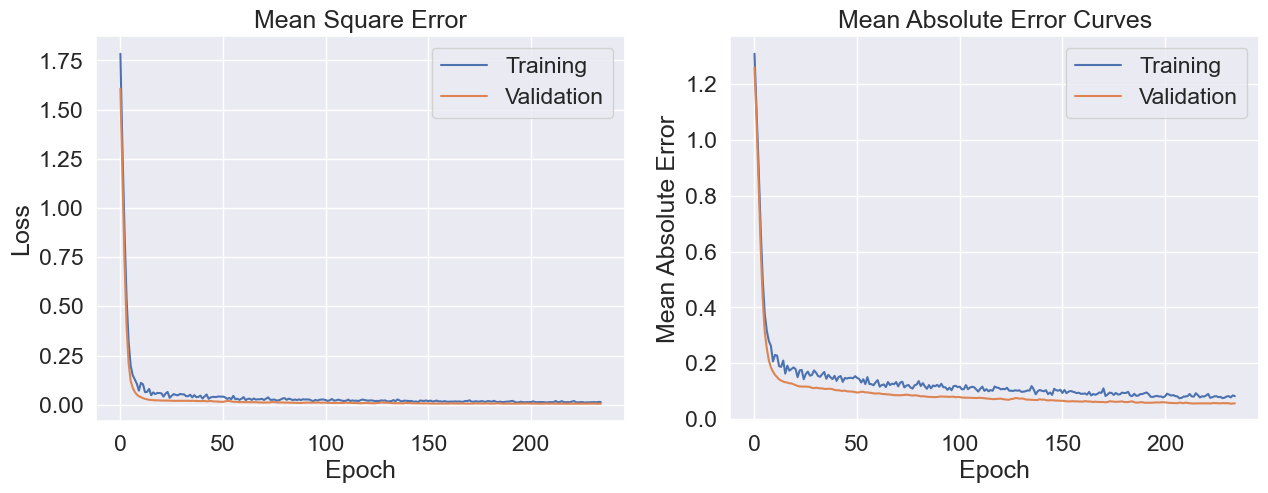

In [165]:
# plot the training history
plot_model_history(tf_model.history)

The mean square error (MSE) and mean absolute error (MAE) curves plotted by the plot_model_history function provide insight into the performance of a TensorFlow neural network during training.

The MSE curve shows how the MSE loss function changes over time for both the training and validation sets. The MSE is a measure of the average squared difference between the predicted and actual values. A lower MSE value indicates that the model is making more accurate predictions. If the MSE value for the validation set starts to increase while the training set MSE continues to decrease, this could be an indication that the model is overfitting and is not generalizing well to new data.

The MAE curve shows how the MAE metric changes over time for both the training and validation sets. The MAE is a measure of the average absolute difference between the predicted and actual values. A lower MAE value also indicates that the model is making more accurate predictions. If the MAE value for the validation set starts to increase while the training set MAE continues to decrease, this could also be an indication of overfitting.

2/2 [==============================] - 0s 3ms/step


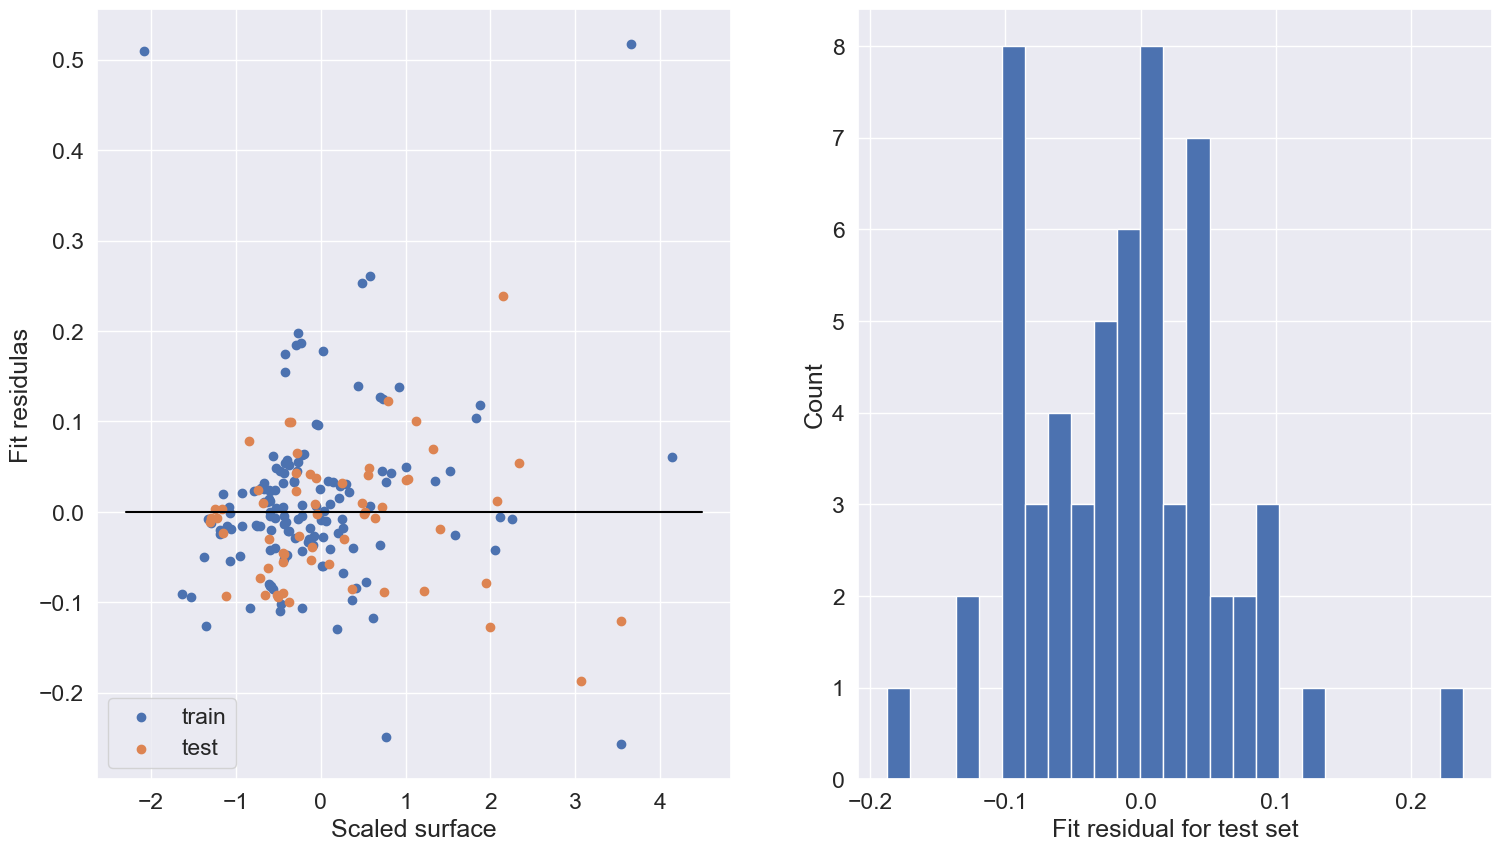

mean residuals: -0.01 
std: 0.07


In [166]:
plotResidue(tf_model, X, y_scaled, rs=rs)

The plotResidue function takes as input a trained TensorFlow neural network model (tf_model), the input feature data (X), and the scaled target data (y_scaled). The function then uses the trained model to make predictions on the input data and compares the predicted values to the actual target values to compute the residuals.

The output of the plotResidue function includes a scatter plot of the residuals as well as summary statistics of the residuals, including the mean and standard deviation.

In this case, the mean of the residuals is -0.01, which indicates that the predictions made by the neural network model tend to be slightly underestimated on average. This means that the actual target values tend to be slightly higher than the predicted values.

The standard deviation of the residuals is 0.07, which indicates the spread or variability of the residuals around the mean. A smaller standard deviation suggests that the model's predictions are more consistent and accurate, while a larger standard deviation suggests that the model's predictions are less accurate and more variable.

Overall, the mean residuals and standard deviation of the residuals can be used to assess the accuracy of the trained TensorFlow neural network model. A small mean and standard deviation suggest that the model is accurate and consistent, while a larger mean and standard deviation suggest that the model may be less accurate and more variable in its predictions.

2/2 [==============================] - 0s 2ms/step


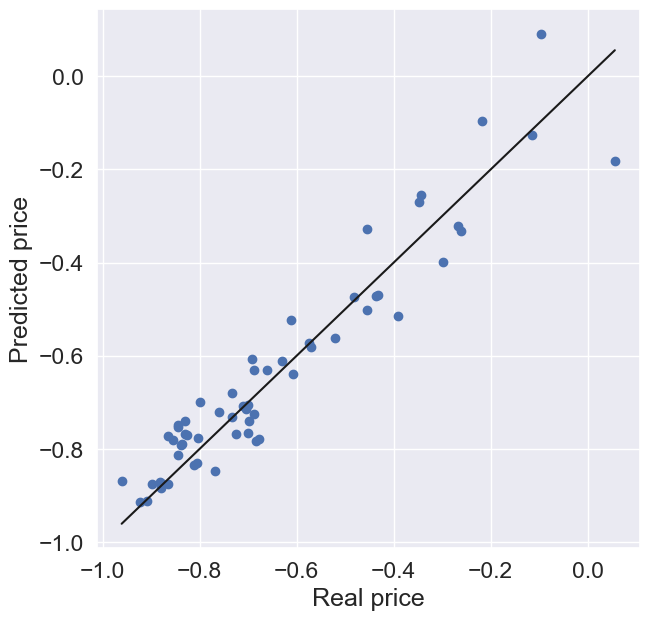

In [167]:
plot_real_pred(tf_model, X, y_scaled, rs)

In [168]:
y_train_pred = tf_model.predict(X_train)
(r2_score( y2price(y_train, R), y2price(y_train_pred, R)), 
mean_squared_error(y2price(y_train, R), y2price(y_train_pred, R)),
mean_absolute_error(y2price(y_train, R), y2price(y_train_pred, R)) )

5/5 [==============================] - 0s 996us/step


(0.8626402215269968, 0.009947177605425529, 0.061672422075664826)

Based on the code and output provided, here's what we can infer:

- The code is evaluating the performance of a machine learning model (specified as tf_model) on a training dataset (specified as X_train) using three metrics: R-squared score, mean squared error, and mean absolute error.
- y_train_pred contains the predicted values of the target variable (y) obtained by applying the tf_model to the X_train dataset.
- y2price is likely a function that maps the predicted and actual target values (y) to a price domain (e.g., if the original y values represent house prices in dollars, then y2price could convert them to a different currency).
- The output shows the values of the three evaluation metrics:
- R-squared score (a measure of how well the predicted values fit the actual values; it ranges between 0 and 1, with higher values indicating better fit) is 0.8626.
- Mean squared error (a measure of the average squared difference between the predicted and actual values; lower values are better) is 0.0099.
- Mean absolute error (a measure of the average absolute difference between the predicted and actual values; lower values are better) is 0.0617.
- The number 5/5 in the output may refer to the number of batches (or mini-batches) processed by the model during the evaluation. The time taken to process each batch is shown as 996us (which stands for microseconds), indicating that the evaluation was quite fast.

Overall, the results suggest that the tf_model is performing reasonably well on the training dataset, with a relatively high R-squared score and low mean squared and absolute errors. However, it's important to keep in mind that these metrics are only indicative of the model's performance on the training data and may not generalize well to new, unseen data. Therefore, it's important to also evaluate the model on a separate validation or test dataset to get a more accurate estimate of its performance.

In [169]:
y_pred = tf_model.predict(X_test)
(r2_score(y2price(y_test, R), y2price(y_pred, R)), 
mean_squared_error(y2price(y_test, R), y2price(y_pred, R)),
mean_absolute_error(y2price(y_test, R), y2price(y_pred, R)) )

2/2 [==============================] - 0s 2ms/step


(0.9036991689950278, 0.005248056341741922, 0.055568097278198454)

Based on the code and output provided, here's what we can infer:

- The code is evaluating the performance of a machine learning model (specified as tf_model) on a test dataset (specified as X_test) using three metrics: R-squared score, mean squared error, and mean absolute error.
- y_pred contains the predicted values of the target variable (y) obtained by applying the tf_model to the X_test dataset.
- y2price is likely a function that maps the predicted and actual target values (y) to a price domain (e.g., if the original y values represent house prices in dollars, then y2price could convert them to a different currency).
- The output shows the values of the three evaluation metrics:
- R-squared score (a measure of how well the predicted values fit the actual values; it ranges between 0 and 1, with higher values indicating better fit) is 0.9037.
- Mean squared error (a measure of the average squared difference between the predicted and actual values; lower values are better) is 0.0052.
- Mean absolute error (a measure of the average absolute difference between the predicted and actual values; lower values are better) is 0.0556.
- The number 2/2 in the output may refer to the number of batches (or mini-batches) processed by the model during the evaluation. The time taken to process each batch is shown as 2ms (which stands for milliseconds), indicating that the evaluation was quite fast.

Overall, the results suggest that the tf_model is performing well on the test dataset, with a relatively high R-squared score and low mean squared and absolute errors. This indicates that the model is able to generalize well to new, unseen data, which is an important property for any machine learning model. However, it's still important to keep in mind that these metrics are only indicative of the model's performance on the test data and may not generalize well to completely new data. Therefore, it's always a good idea to also evaluate the model on multiple test sets or cross-validate the performance to get a more accurate estimate of its true performance.